### Carregamento e tratamento dos dados

In [1]:
#Importação das 1ªs bibliotecas e acesso aos dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importação dos datasets
channels = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/channels.csv')
deliveries = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/deliveries.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/drivers.csv')
hubs = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/hubs.csv', encoding='ISO-8859-1')
orders = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/orders.csv')
payments = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/payments.csv')
stores = pd.read_csv('https://raw.githubusercontent.com/deliverycenter/datalab-work-at-deliverycenter/main/datasets/stores.csv', encoding='ISO-8859-1')

In [ ]:
orders.head(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,1,1,1,2021,1/1/2021 12:01:36 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,4,1,1,2021,1/1/2021 12:04:26 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,13,1,1,2021,1/1/2021 12:13:07 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.merge(deliveries, drivers, on=['driver_id'])

In [ ]:
df1 = pd.merge(orders, df, on=['delivery_order_id'])

In [ ]:
df2 = pd.merge(channels, df1, on=['channel_id'])

In [ ]:
df3 = pd.merge(payments, df2, on=['payment_order_id'])

In [ ]:
hs = pd.merge(hubs, stores, on=['hub_id'])

In [ ]:
dados = pd.merge(df3, hs, on=['store_id'])

In [287]:
dados.head(3)

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status,channel_id,channel_name,channel_type,order_id,store_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,delivery_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,4427917,68410055,118.44,0.00,VOUCHER,PAID,35,BRAZIL PLACE,MARKETPLACE,68410055,2181,68410055,FINISHED,394.8,0.01,6.00,2,32,1,Janeiro,2021,6.63,4.550000,2391.25,7.170000,11.72,21.75,2424.72,2180133,10239.0,1035.0,DELIVERED,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366
6,4496318,70804201,42.01,0.84,ONLINE,PAID,35,BRAZIL PLACE,MARKETPLACE,70804201,2181,70804201,FINISHED,42.0,0.01,6.00,11,52,12,Janeiro,2021,2.10,4.920000,125.58,3.130000,8.05,13.05,146.68,2236161,14059.0,1612.0,DELIVERED,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366
7,4498706,70861023,29.91,0.60,ONLINE,PAID,35,BRAZIL PLACE,MARKETPLACE,70861023,2181,70861023,FINISHED,29.9,0.01,10.76,17,37,12,Janeiro,2021,1.80,30.875996,18.57,30.875996,2.70,14.55,35.83,2238263,1015.0,4085.0,DELIVERED,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366


In [288]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325805 entries, 0 to 410861
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   payment_id                         325805 non-null  int64   
 1   payment_order_id                   325805 non-null  int64   
 2   payment_amount                     325805 non-null  float64 
 3   payment_fee                        325805 non-null  float64 
 4   payment_method                     325805 non-null  category
 5   payment_status                     325805 non-null  category
 6   channel_id                         325805 non-null  int64   
 7   channel_name                       325805 non-null  category
 8   channel_type                       325805 non-null  category
 9   order_id                           325805 non-null  int64   
 10  store_id                           325805 non-null  int64   
 11  delivery_order_id         

In [ ]:
# eliminado algumas informações que não utilizarei para esta análise
dados.drop(columns=['order_moment_created', 'order_moment_accepted', 'order_moment_ready', 'order_moment_ready', 'order_moment_collected', 'order_moment_collected',
                    'order_moment_collected', 'order_moment_in_expedition', 'order_moment_delivering' , 'order_moment_delivered', 'order_moment_finished'], inplace=True)

In [312]:
dados.drop(columns=['payment_status', 'channel_id', 'order_status', 'delivery_status' ], inplace=True)

In [ ]:
# Transformando variáveis objeto em categoricas para reduzir o uso da memória
categoricas = ['payment_method', 'payment_status', 'channel_name', 'channel_type', 'order_status','delivery_status', 'driver_modal', 'driver_type', 'hub_name',	'hub_city',	'hub_state', 'store_name',	'store_segment']
for c in categoricas:
    dados[c] = dados[c].astype('category')

In [ ]:
dados['QuantiaPaga'] = dados['payment_amount']
dados['TaxaPgmto'] = dados['payment_fee']
dados['ValorPedido'] = dados['order_amount']
dados['TaxaEntrega'] = dados['order_delivery_fee']
dados['CustoEntregaPed'] = dados['order_delivery_cost']
dados['MesVenda'] = dados['order_created_month']
dados.drop(columns=['payment_amount', 'payment_fee', 'order_amount', 'order_delivery_fee', 'order_delivery_cost', 'order_created_month' ], inplace=True)
dados.head(3)

In [ ]:
# Verificando campos vazios
dados.isnull().sum()

payment_id                               0
payment_order_id                         0
payment_amount                           0
payment_fee                              0
payment_method                           0
payment_status                           0
channel_id                               0
channel_name                             0
channel_type                             0
order_id                                 0
store_id                                 0
delivery_order_id                        0
order_status                             0
order_amount                             0
order_delivery_fee                       0
order_delivery_cost                   3874
order_created_hour                       0
order_created_minute                     0
order_created_day                        0
order_created_month                      0
order_created_year                       0
order_metric_collected_time          35365
order_metric_paused_time             56082
order_metri

In [ ]:
# substituindo campos vazios pela media
nulos = ['order_metric_collected_time','order_metric_paused_time','order_metric_production_time','order_metric_walking_time','order_metric_expediton_speed_time','order_metric_transit_time', 'store_plan_price']
dados[nulos] = dados[nulos].replace({np.nan: dados['order_metric_collected_time'].mean(), 
                                     np.nan: dados['order_metric_paused_time'].mean(), 
                                     np.nan: dados['order_metric_production_time'].mean(),
                                     np.nan: dados['order_metric_walking_time'].mean(),
                                     np.nan: dados['order_metric_expediton_speed_time'].mean(),
                                     np.nan: dados['order_metric_transit_time'].mean(),
                                     np.nan: dados['store_plan_price'].mean()})
dados.isnull().sum()

payment_id                              0
payment_order_id                        0
payment_amount                          0
payment_fee                             0
payment_method                          0
payment_status                          0
channel_id                              0
channel_name                            0
channel_type                            0
order_id                                0
store_id                                0
delivery_order_id                       0
order_status                            0
order_amount                            0
order_delivery_fee                      0
order_delivery_cost                  3874
order_created_hour                      0
order_created_minute                    0
order_created_day                       0
order_created_month                     0
order_created_year                      0
order_metric_collected_time             0
order_metric_paused_time                0
order_metric_production_time      

In [ ]:
# Eliminando as linhas dos dados nulos
dados.dropna(axis = 0, inplace = True)
dados.isnull().sum()

payment_id                           0
payment_order_id                     0
payment_amount                       0
payment_fee                          0
payment_method                       0
payment_status                       0
channel_id                           0
channel_name                         0
channel_type                         0
order_id                             0
store_id                             0
delivery_order_id                    0
order_status                         0
order_amount                         0
order_delivery_fee                   0
order_delivery_cost                  0
order_created_hour                   0
order_created_minute                 0
order_created_day                    0
order_created_month                  0
order_created_year                   0
order_metric_collected_time          0
order_metric_paused_time             0
order_metric_production_time         0
order_metric_walking_time            0
order_metric_expediton_sp

In [ ]:
dados.describe()

,payment_id,payment_order_id,payment_amount,payment_fee,channel_id,order_id,store_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,delivery_id,driver_id,delivery_distance_meters,hub_id,hub_latitude,hub_longitude,store_plan_price,store_latitude,store_longitude
count,4.050620e+05,4.050620e+05,405062.000000,405062.000000,405062.000000,4.050620e+05,405062.000000,4.050620e+05,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.0,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,4.050620e+05,405062.000000,4.050620e+05,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000
mean,4.945900e+06,8.222740e+07,92.869405,1.882155,7.417210,8.222740e+07,1246.868810,8.222740e+07,95.373977,6.000426,7.670046,16.779021,29.409093,16.003037,2.676901,2021.0,4.955507,12.033778,39.179663,8.497665,18.634527,54.775314,117.166394,2.634457e+06,20962.725914,2.711751e+03,25.846211,-24.140190,-46.076703,30.822873,-24.140310,-46.077996
std,2.995080e+05,6.966723e+06,217.286943,4.454420,7.823826,6.966723e+06,1178.041855,6.966723e+06,216.325504,5.997376,3.402286,6.090043,17.218447,8.816611,1.089099,0.0,12.093301,67.196458,229.308466,15.969910,88.697011,972.332972,1025.377679,2.634692e+05,15526.150624,1.740205e+04,15.524180,2.075449,2.543303,19.956263,2.074560,2.542908
min,4.427917e+06,6.841006e+07,0.000000,0.000000,1.000000,6.841006e+07,6.000000,6.841006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.0,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.530000,2.174658e+06,133.000000,0.000000e+00,3.000000,-30.085743,-51.245997,0.000000,-30.085743,-51.245997
25%,4.687434e+06,7.639852e+07,32.900000,0.450000,5.000000,7.639852e+07,415.000000,7.639852e+07,39.000000,0.000000,5.640000,15.000000,15.000000,8.000000,2.000000,2021.0,0.830000,1.350000,9.280000,2.370000,4.500000,11.820000,32.850000,2.408630e+06,7615.000000,1.149000e+03,16.000000,-23.622995,-46.718197,0.010000,-23.622995,-46.721291
50%,4.947425e+06,8.310810e+07,66.400000,1.050000,5.000000,8.310810e+07,707.000000,8.310810e+07,67.920000,6.900000,7.490000,17.000000,29.000000,16.000000,3.000000,2021.0,1.820000,3.130000,15.520000,4.080000,6.750000,16.730000,42.120000,2.638348e+06,18715.000000,2.007000e+03,26.000000,-23.561053,-46.618353,30.875996,-23.561053,-46.618490
75%,5.201854e+06,8.785654e+07,121.700000,2.740000,5.000000,8.785654e+07,1928.000000,8.785654e+07,116.800000,11.900000,8.890000,22.000000,44.000000,24.000000,4.000000,2021.0,3.620000,9.420000,22.970000,7.280000,11.050000,24.820000,55.180000,2.858046e+06,31090.000000,3.339000e+03,33.000000,-22.969880,-43.370811,49.900000,-22.973150,-43.370811
max,5.540806e+06,9.313982e+07,100000.110000,2000.000000,49.000000,9.313982e+07,4679.000000,9.313982e+07,100000.110000,990.110000,156.000000,23.000000,59.000000,31.000000,4.000000,2021.0,1887.300000,11712.280000,30625.100000,2463.170000,11718.200000,154261.100000,154277.320000,3.144739e+06,66459.000000,7.251291e+06,86.000000,-22.885820,-43.182181,49.900000,-22.884332,-43.176536


In [ ]:
dados[dados['order_metric_collected_time'] < 0].value_counts().sum()
# Elimando linhas
linha = dados[dados['order_metric_collected_time'] < 0].index
dados.drop(linha, inplace = True)

In [ ]:
dados[dados['order_metric_paused_time'] < 0].value_counts().sum()
# Elimando linhas
linha = dados[dados['order_metric_paused_time'] < 0].index
dados.drop(linha, inplace = True)

In [ ]:
dados[dados['order_metric_walking_time'] < 0].value_counts().sum()
# Elimando linhas
linha = dados[dados['order_metric_walking_time'] < 0].index
dados.drop(linha, inplace = True)

In [ ]:
dados[dados['order_metric_expediton_speed_time'] < 0].value_counts().sum()
# Elimando linhas
linha = dados[dados['order_metric_expediton_speed_time'] < 0].index
dados.drop(linha, inplace = True)

In [ ]:
dados[dados['order_metric_transit_time'] < 0].value_counts().sum()
# Elimando linhas
linha = dados[dados['order_metric_transit_time'] < 0].index
dados.drop(linha, inplace = True)

Busca por Outliers

In [ ]:
dados.describe()

,payment_id,payment_order_id,payment_amount,payment_fee,channel_id,order_id,store_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,delivery_id,driver_id,delivery_distance_meters,hub_id,hub_latitude,hub_longitude,store_plan_price,store_latitude,store_longitude
count,4.050620e+05,4.050620e+05,405062.000000,405062.000000,405062.000000,4.050620e+05,405062.000000,4.050620e+05,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.0,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,4.050620e+05,405062.000000,4.050620e+05,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000,405062.000000
mean,4.945900e+06,8.222740e+07,92.869405,1.882155,7.417210,8.222740e+07,1246.868810,8.222740e+07,95.373977,6.000426,7.670046,16.779021,29.409093,16.003037,2.676901,2021.0,4.955507,12.033778,39.179663,8.497665,18.634527,54.775314,117.166394,2.634457e+06,20962.725914,2.711751e+03,25.846211,-24.140190,-46.076703,30.822873,-24.140310,-46.077996
std,2.995080e+05,6.966723e+06,217.286943,4.454420,7.823826,6.966723e+06,1178.041855,6.966723e+06,216.325504,5.997376,3.402286,6.090043,17.218447,8.816611,1.089099,0.0,12.093301,67.196458,229.308466,15.969910,88.697011,972.332972,1025.377679,2.634692e+05,15526.150624,1.740205e+04,15.524180,2.075449,2.543303,19.956263,2.074560,2.542908
min,4.427917e+06,6.841006e+07,0.000000,0.000000,1.000000,6.841006e+07,6.000000,6.841006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.0,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.530000,2.174658e+06,133.000000,0.000000e+00,3.000000,-30.085743,-51.245997,0.000000,-30.085743,-51.245997
25%,4.687434e+06,7.639852e+07,32.900000,0.450000,5.000000,7.639852e+07,415.000000,7.639852e+07,39.000000,0.000000,5.640000,15.000000,15.000000,8.000000,2.000000,2021.0,0.830000,1.350000,9.280000,2.370000,4.500000,11.820000,32.850000,2.408630e+06,7615.000000,1.149000e+03,16.000000,-23.622995,-46.718197,0.010000,-23.622995,-46.721291
50%,4.947425e+06,8.310810e+07,66.400000,1.050000,5.000000,8.310810e+07,707.000000,8.310810e+07,67.920000,6.900000,7.490000,17.000000,29.000000,16.000000,3.000000,2021.0,1.820000,3.130000,15.520000,4.080000,6.750000,16.730000,42.120000,2.638348e+06,18715.000000,2.007000e+03,26.000000,-23.561053,-46.618353,30.875996,-23.561053,-46.618490
75%,5.201854e+06,8.785654e+07,121.700000,2.740000,5.000000,8.785654e+07,1928.000000,8.785654e+07,116.800000,11.900000,8.890000,22.000000,44.000000,24.000000,4.000000,2021.0,3.620000,9.420000,22.970000,7.280000,11.050000,24.820000,55.180000,2.858046e+06,31090.000000,3.339000e+03,33.000000,-22.969880,-43.370811,49.900000,-22.973150,-43.370811
max,5.540806e+06,9.313982e+07,100000.110000,2000.000000,49.000000,9.313982e+07,4679.000000,9.313982e+07,100000.110000,990.110000,156.000000,23.000000,59.000000,31.000000,4.000000,2021.0,1887.300000,11712.280000,30625.100000,2463.170000,11718.200000,154261.100000,154277.320000,3.144739e+06,66459.000000,7.251291e+06,86.000000,-22.885820,-43.182181,49.900000,-22.884332,-43.176536


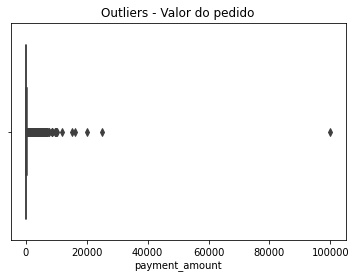

In [ ]:
import seaborn as sns
sns.boxplot(dados['payment_amount']).set_title('Outliers - Valor do pedido');

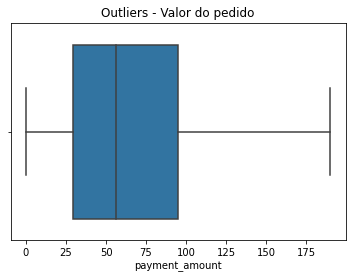

In [ ]:
# Eliminando os valores discrepantes - Desvio padrão $216,00
outliers = dados[(dados['payment_amount'] > 190)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['payment_amount']).set_title('Outliers - Valor do pedido');

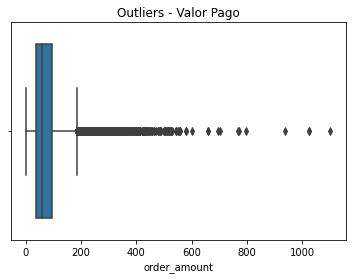

In [ ]:
sns.boxplot(dados['order_amount']).set_title('Outliers - Valor Pago');

In [ ]:
# Eliminando os valores discrepantes - Desvio padrão $217,00
outliers = dados[(dados['order_amount'] > 225)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['order_amount']).set_title('Outliers - Valor pago');

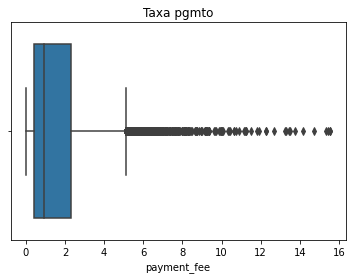

In [ ]:
# Desvio padrão 4,45
sns.boxplot(dados['payment_fee']).set_title('Taxa');

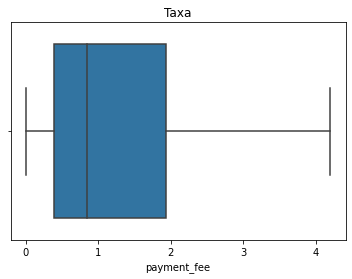

In [ ]:
# Eliminando os valores discrepantes
outliers = dados[(dados['payment_fee'] > 4.2)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['payment_fee']).set_title('Taxa');

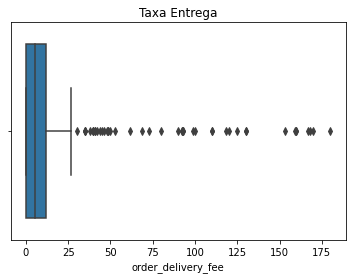

In [ ]:
# Desvio padrão 6 pila
sns.boxplot(dados['order_delivery_fee']).set_title('Taxa Entrega');

In [ ]:
dados[(dados['order_delivery_fee'] > 12)].value_counts().sum()

5324

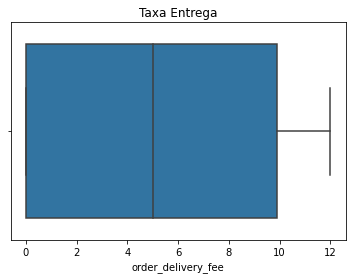

In [ ]:
# Eliminando os valores discrepantes
outliers = dados[(dados['order_delivery_fee'] > 12)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['order_delivery_fee']).set_title('Taxa Entrega');

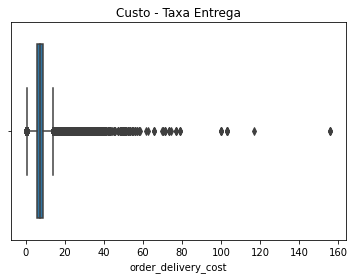

In [ ]:
# Desvio padrão 3.4
sns.boxplot(dados['order_delivery_cost']).set_title('Custo - Taxa Entrega');

In [ ]:
dados.order_delivery_cost.describe()

count    345775.000000
mean          7.550454
std           3.166851
min           0.000000
25%           5.560000
50%           7.410000
75%           8.800000
max         156.000000
Name: order_delivery_cost, dtype: float64

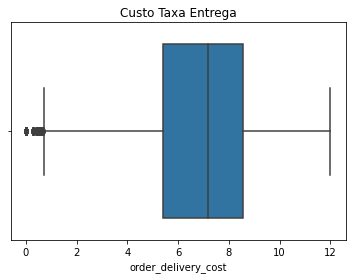

In [ ]:
# Eliminando os valores discrepantes
outliers = dados[(dados['order_delivery_cost'] > 12)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['order_delivery_cost']).set_title('Custo Taxa Entrega');

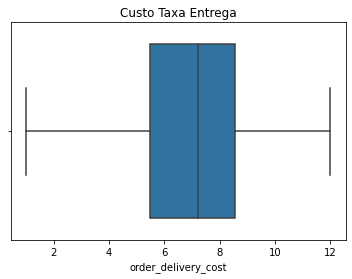

In [ ]:
#dados[(dados['order_delivery_cost'] < 1)].value_counts().sum()
# Eliminando os valores discrepantes
outliers = dados[(dados['order_delivery_cost'] < 1)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['order_delivery_cost']).set_title('Custo Taxa Entrega');

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325805 entries, 0 to 410861
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   payment_id                         325805 non-null  int64   
 1   payment_order_id                   325805 non-null  int64   
 2   payment_amount                     325805 non-null  float64 
 3   payment_fee                        325805 non-null  float64 
 4   payment_method                     325805 non-null  category
 5   payment_status                     325805 non-null  category
 6   channel_id                         325805 non-null  int64   
 7   channel_name                       325805 non-null  category
 8   channel_type                       325805 non-null  category
 9   order_id                           325805 non-null  int64   
 10  store_id                           325805 non-null  int64   
 11  delivery_order_id         

In [313]:
dados.to_csv('dados_tratados.csv')

### Analise Exploratoria

**Ciência e Modelagem de dados**

* Faça um estudo exploratório dos dados. O que você descobriu sobre eles? Qual a relevância das suas decobertas para o negócio?
* Que tal aplicar técnicas de estatística ou pesquisa operacional para extrair algum valor desses dados?
* Desenvolva e implemente pelo menos 2 (duas) diferentes abordagens de modelagem de dados para resolver dois diferentes problemas. Seja criativo(a).
* Estamos interessado na sua forma científica de trabalhar. Pense nisso.
* Fique livre para criar sua própria abordagem, as dicas acima foram apenas sugestões.

**O que esperamos**

* Candidatos que demonstrem um bom storytelling orientado a resolver problemas de negócio.
* Candidatos que demonstrem criatividade, organização, praticidade e objetividade na solução de problemas.
* Que um leigo seja capaz de entender suas decisões e abordagens técnicas/metodológicas.
* Que suas decisões e abordagens sejam explicáveis e tenham algum embasamento teórico.
* Candidatos com excelente "poder de síntese". O tempo está cada vez mais escasso e é importante saber resumir, sem perder de contexto dos dados.

**Como submeter o seu trabalho**

* Inserir link do formulário
* Clonar no github

In [68]:
import pandas as pd
dados = pd.read_csv('dados_tratados.csv')
pd.set_option('display.max_columns', 60)
dados.drop(columns=['Unnamed: 0', 'payment_id', 'payment_order_id','delivery_order_id','order_created_minute','order_metric_collected_time','order_metric_paused_time',
                    'order_metric_production_time','order_metric_walking_time', 'order_metric_expediton_speed_time', 'order_metric_transit_time', 'order_metric_cycle_time'], inplace=True)

,payment_id,payment_order_id,payment_method,channel_name,channel_type,order_id,store_id,delivery_order_id,order_created_hour,order_created_minute,order_created_day,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda
0,4427917,68410055,VOUCHER,BRAZIL PLACE,MARKETPLACE,68410055,2181,68410055,2,32,1,2021,6.63,4.550000,2391.25,7.170000,11.72,21.75,2424.72,2180133,10239.0,1035.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,118.44,0.00,394.8,0.01,6.00,Janeiro
1,4496318,70804201,ONLINE,BRAZIL PLACE,MARKETPLACE,70804201,2181,70804201,11,52,12,2021,2.10,4.920000,125.58,3.130000,8.05,13.05,146.68,2236161,14059.0,1612.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,42.01,0.84,42.0,0.01,6.00,Janeiro
2,4498706,70861023,ONLINE,BRAZIL PLACE,MARKETPLACE,70861023,2181,70861023,17,37,12,2021,1.80,30.875996,18.57,30.875996,2.70,14.55,35.83,2238263,1015.0,4085.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,29.91,0.60,29.9,0.01,10.76,Janeiro


In [70]:
dados['CustosDir'] = (dados['TaxaPgmto'] + dados['TaxaEntrega'] + dados['CustoEntregaPed'])*-1
dados['DifPedPago'] = (-dados['ValorPedido'] + dados['QuantiaPaga'])
dados['Margem'] = 1 - (abs(dados['CustosDir'])) / dados['ValorPedido'] 
dados.sample(5)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem
187158,ONLINE,FOOD PLACE,MARKETPLACE,87545331,294,23,1,2021,2840397,47131.0,1979.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218,PAPA SUCIS,FOOD,0.000000,-22.885820,-43.279218,42.75,0.60,39.30,3.45,7.59,Abril,-11.64,3.45,0.703817
84244,ONLINE,FOOD PLACE,MARKETPLACE,76376486,416,23,7,2021,2407371,26536.0,3002.0,MOTOBOY,FREELANCE,21,WOLF SHOPPING,SÃO PAULO,SP,-23.550407,-46.697316,IUMPICA,FOOD,0.000000,-23.550407,-46.721291,91.80,2.48,79.90,11.90,9.25,Fevereiro,-23.63,11.90,0.704255
45417,VOUCHER,FOOD PLACE,MARKETPLACE,92767340,3091,20,26,2021,3060741,55322.0,2287.0,MOTOBOY,FREELANCE,25,AVENUE SHOPPING,SÃO PAULO,SP,-23.567703,-46.642043,PIGUE PIPACO,FOOD,49.900000,-23.570765,-46.642043,10.00,0.00,30.80,0.00,5.65,Abril,-5.65,-20.80,0.816558
251822,VOUCHER,EATS PLACE,MARKETPLACE,86596804,1928,15,28,2021,2785444,22198.0,6755.0,MOTOBOY,LOGISTIC OPERATOR,44,FORTRAN SHOPPING,CURITIBA,PR,-25.435140,-49.316788,SIZMUO RICAUMS,FOOD,49.900000,-25.435140,-49.316788,42.00,0.00,112.00,0.00,11.85,Março,-11.85,-70.00,0.894196
265226,VOUCHER,FOOD PLACE,MARKETPLACE,84172811,390,0,17,2021,2680356,40864.0,727.0,MOTOBOY,FREELANCE,17,SMALL SHOPPING,SÃO PAULO,SP,-23.592004,-46.636504,PAZZI ZUM,FOOD,49.900000,-23.592004,-46.636504,10.00,0.00,53.84,0.00,4.66,Março,-4.66,-43.84,0.913447
320517,DEBIT,OWN PLACE,OWN CHANNEL,86169833,4443,17,26,2021,2765519,4692.0,2510.0,MOTOBOY,FREELANCE,75,PYTHON SHOPPING,CURITIBA,PR,-25.477073,-49.289660,GIPUMZIGUM,GOOD,49.000000,-25.477073,-49.289660,139.80,2.80,139.80,0.00,5.57,Março,-8.37,0.00,0.940129
188177,ONLINE,FOOD PLACE,MARKETPLACE,91505311,294,15,20,2021,3006553,6646.0,5511.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218,PAPA SUCIS,FOOD,0.000000,-22.885820,-43.279218,44.75,0.63,39.80,4.95,11.06,Abril,-16.64,4.95,0.581910
17495,ONLINE,FOOD PLACE,MARKETPLACE,84071574,274,18,16,2021,2676724,17760.0,2240.0,MOTOBOY,FREELANCE,16,PEOPLE SHOPPING,RIO DE JANEIRO,RJ,-23.017472,-43.479939,IUMPICA,FOOD,0.000000,-23.017472,-43.479939,58.80,1.59,46.90,11.90,7.70,Março,-21.19,11.90,0.548188
182135,ONLINE,FOOD PLACE,MARKETPLACE,70889010,294,20,12,2021,2239002,1251.0,1986.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218,PAPA SUCIS,FOOD,0.000000,-22.885820,-43.279218,49.20,0.69,39.30,9.90,9.16,Janeiro,-19.75,9.90,0.497455
53027,ONLINE,FOOD PLACE,MARKETPLACE,82709551,632,14,10,2021,2621536,25651.0,2708.0,MOTOBOY,LOGISTIC OPERATOR,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984,IPUPIEMAI,FOOD,30.875996,-23.595775,-46.685984,120.80,3.26,108.90,11.90,7.52,Março,-22.68,11.90,0.791736


In [76]:
dados.describe()

,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,hub_id,hub_latitude,hub_longitude,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,CustosDir,DifPedPago,Margem
count,3.258050e+05,325805.000000,325805.000000,325805.000000,325805.0,3.258050e+05,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,325805.000000,3.258050e+05
mean,8.214713e+07,1308.727536,16.773260,16.010789,2021.0,2.631240e+06,20917.423941,2314.600200,25.723899,-24.172919,-46.082324,32.125715,-24.173584,-46.083680,63.648355,1.188746,67.832721,5.342982,7.157576,-13.689304,-4.184366,-inf
std,6.997672e+06,1227.701418,6.145413,8.760143,0.0,2.646076e+05,15501.430419,2569.415669,15.940339,2.108766,2.595039,20.359835,2.108518,2.594774,43.519948,1.120843,39.773234,4.928975,1.997827,6.106194,25.891318,NaN
min,6.841006e+07,6.000000,0.000000,1.000000,2021.0,2.174658e+06,133.000000,0.000000,3.000000,-30.085743,-51.245997,0.000000,-30.085743,-51.245997,0.000000,0.000000,0.000000,0.000000,1.000000,-28.080000,-1100.000000,-inf
25%,7.632977e+07,409.000000,15.000000,8.000000,2021.0,2.405480e+06,7615.000000,1083.000000,13.000000,-23.629826,-46.735203,0.010000,-23.631667,-46.735203,28.800000,0.380000,35.800000,0.000000,5.480000,-19.240000,-4.000000,6.821138e-01
50%,8.289274e+07,791.000000,17.000000,16.000000,2021.0,2.629431e+06,18715.000000,1887.000000,26.000000,-23.561053,-46.618353,30.875996,-23.561053,-46.618353,54.900000,0.810000,58.500000,5.000000,7.220000,-12.820000,0.000000,7.833333e-01
75%,8.785388e+07,2156.000000,22.000000,24.000000,2021.0,2.857426e+06,31055.000000,3041.000000,33.000000,-22.969880,-43.359636,49.900000,-22.973150,-43.361197,93.500000,1.850000,92.400000,10.000000,8.550000,-8.390000,9.900000,8.492462e-01
max,9.313982e+07,4679.000000,23.000000,31.000000,2021.0,3.115392e+06,66459.000000,469527.000000,86.000000,-22.885820,-43.182181,49.900000,-22.884332,-43.176536,190.000000,4.200000,1101.600000,12.000000,12.000000,-1.150000,86.300000,9.913762e-01


In [92]:
# Seleciona e exclui linhas selecionadas com condições.
dados[dados['Margem'] < 0.1]
#dados.drop(dados.loc[dados['Margem'] < 0.1].index, inplace=True)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem


In [121]:
dados.Margem.describe().round(2)

count    319987.00
mean          0.75
std           0.14
min           0.10
25%           0.68
50%           0.78
75%           0.85
max           0.98
Name: Margem, dtype: float64

* A margem de faturamento é de em média 75% do valor do pedido.

In [101]:
# Preço Plano Loja
dados.store_plan_price.describe()

count    323562.000000
mean         32.100446
std          20.371292
min           0.000000
25%           0.010000
50%          30.875996
75%          49.900000
max          49.900000
Name: store_plan_price, dtype: float64

In [120]:
# Dados ticket
dados.ValorPedido.describe()

count    319987.000000
mean         66.681677
std          36.551831
min           5.000000
25%          35.800000
50%          58.000000
75%          91.800000
max         175.000000
Name: ValorPedido, dtype: float64

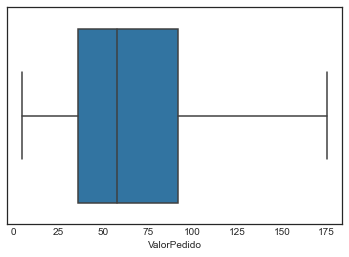

In [119]:
import seaborn as sns
sns.boxplot(x=dados['ValorPedido']);

In [118]:
 # Seleciona e exclui linhas selecionadas com condições.
dados[dados['ValorPedido'] > 180]
dados.drop(dados.loc[dados['ValorPedido'] > 175].index, inplace=True)

* O ticket médio dos pedidos é de R$60.

In [104]:
# Taxa de entrega
dados.TaxaEntrega.describe()

count    323562.000000
mean          5.336193
std           4.931867
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          12.000000
Name: TaxaEntrega, dtype: float64

In [60]:
# Resumo estatistico dos clientes
dados['store_name'].describe()

count       325805
unique         399
top       IUMPICA 
freq         65265
Name: store_name, dtype: object

Existem 399 clientes na base de dados e o maior cliente por quantidade de pedidos é o IUMPICA.

In [51]:
# Resumo estatistico dos clientes por Mês
dados.groupby('MesVenda')['store_name'].describe()

,count,unique,top,freq
MesVenda,,,,
Abril,90898,314,IUMPICA,19288
Fevereiro,67059,261,IUMPICA,12880
Janeiro,66691,260,IUMPICA,14239
Março,101157,316,IUMPICA,18858


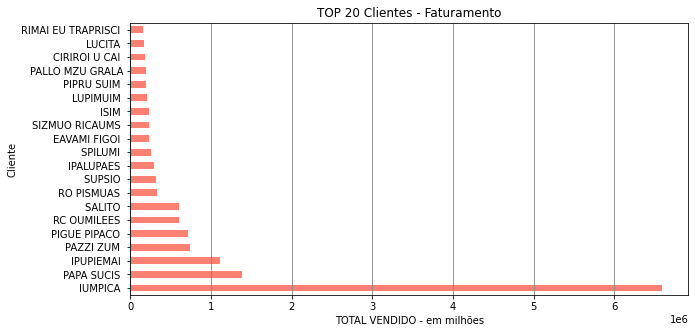

In [20]:
top_cl = dados.groupby('store_name')['QuantiaPaga'].sum()
top_cl = top_cl.sort_values(ascending=False).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='salmon')
plt.title('TOP 20 Clientes - Faturamento')
plt.xlabel('TOTAL VENDIDO - em milhões')
plt.ylabel('Cliente')
plt.grid(axis='x', color='gray')
plt.show();

In [55]:
top_cl = dados.groupby('store_name')['QuantiaPaga'].sum()
top_cl = top_cl.sort_values(ascending=False).head(20).round(2)
top_cl

store_name
IUMPICA                6591668.02
PAPA SUCIS             1382357.53
IPUPIEMAI              1112478.38
PAZZI ZUM               742250.70
PIGUE PIPACO            716679.92
RC OUMILEES             608043.12
SALITO                  596977.50
RO PISMUAS              329188.55
SUPSIO                  316489.56
IPALUPAES               297211.59
SPILUMI                 254612.90
EAVAMI FIGOI            234567.45
SIZMUO RICAUMS          227437.01
ISIM                    226336.02
LUPIMUIM                201044.32
PIPRU SUIM              195799.28
PALLO MZU GRALA         194362.62
CIRIROI U CAI           175821.37
LUCITA                  162304.68
RIMAI EU TRAPRISCI      159319.73
Name: QuantiaPaga, dtype: float64

In [56]:
# Total representatividade 
top_cl.sum() / dados['QuantiaPaga'].sum()

0.7100826579706717

* Esses são os 20 maiores clientes da companhia. Representam um total de 71% do faturamento da empresa.

In [72]:
# Total faturado pela empresa
fat = dados['QuantiaPaga'].sum().round(2)
print(f'O valor total faturado pela empresa até o momento foi de R$ {fat}')

O valor total faturado pela empresa até o momento foi de R$ 20736952.36


In [57]:
# Faturamento IUMPICA
top1 = dados.groupby('store_name')['QuantiaPaga'].sum()
top1 = top1.sort_values(ascending=False).head(1).round(2)
top1
#6591668.02 / 20736952.36

store_name
IUMPICA     6591668.02
Name: QuantiaPaga, dtype: float64

In [59]:
top1 / (dados['QuantiaPaga'].sum().round(2)) *100

store_name
IUMPICA     31.787063
Name: QuantiaPaga, dtype: float64

In [36]:
# Faturamento PAPA SUCIS
1382357.53 / 20736952.36

0.06666155691549266

In [37]:
# Faturamento IPUPIEMAI
1112478.38 / 20736952.36

0.0536471493345322

In [38]:
# Faturamento dos tres maiores clientes
(6591668.02 + 1382357.53 + 1112478.38) / 20736952.36

0.4381793318639808

* O faturamento da empresa até o momento (JAN-ABR) foi de R$ 20.736,952,36, sendo que o maior cliente correspndeu por 31,79% do valor total. Logo, há uma dependência do faturamento deste cliente de 1/3.
* Apesar de haver 399 clientes na base, 20 clientes representam 71% do faturamento da empresa. Os três maiores clientes representam 43,82% do faturamento.
* As vendas não são pulverizadas.

**Vendas**

In [73]:
# Verificando a qtde de pedidos por cidade
dados['hub_city'].value_counts()

SÃO PAULO         136402
RIO DE JANEIRO    125897
PORTO ALEGRE       33573
CURITIBA           29933
Name: hub_city, dtype: int64

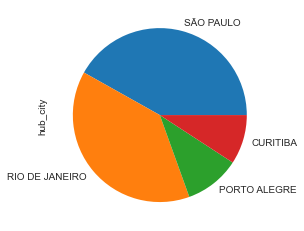

In [75]:
# Distribuição Gráfica
dados['hub_city'].value_counts().plot(kind='pie');

In [11]:
# Qtde de pedidos por mês
dados['MesVenda'].value_counts()

Março        101157
Abril         90898
Fevereiro     67059
Janeiro       66691
Name: MesVenda, dtype: int64

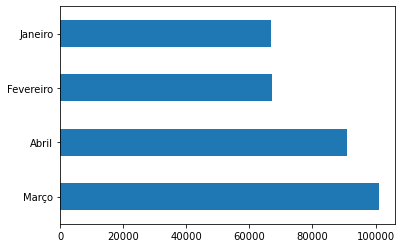

In [11]:
#Qtde pedidos por Mês
dados['MesVenda'].value_counts().plot(kind='barh');

### Dados por Região

In [122]:
# Criando variáveis de cada Estado
SP = dados[dados['hub_state'] == 'SP']
RJ = dados[dados['hub_state'] == 'RJ']
PR = dados[dados['hub_state'] == 'PR']
RS = dados[dados['hub_state'] == 'RS']

In [123]:
# Quantidade de pedidos
PR['MesVenda'].value_counts()

Março        11523
Abril         7594
Fevereiro     5765
Janeiro       4435
Name: MesVenda, dtype: int64

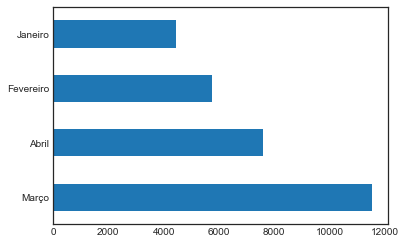

In [125]:
# Quantidade de pedidos realizados
PR['MesVenda'].value_counts().plot(kind='barh');

In [124]:
# Total faturado no período R$
PR['QuantiaPaga'].sum()

1311743.21

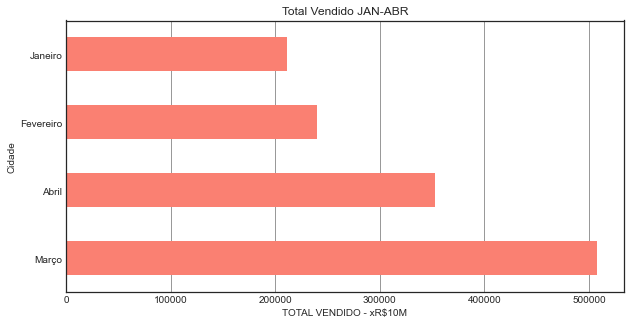

In [126]:
top_pr = PR.groupby('MesVenda')['QuantiaPaga'].sum()
top_pr = top_pr.sort_values(ascending=False)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_pr.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [139]:
# Top 20 Cliente no Paraná por faturamento
top_pr = PR.groupby('store_name')['QuantiaPaga'].sum()
top_pr = top_pr.sort_values(ascending=False).head(20)
top_pr

store_name
RO PISMUAS            325522.88
SUSZAIGA              154445.75
SIZMUO RICAUMS        152465.51
VUG U LUV              84138.03
CIRIOURI PURGAR        60661.50
RIRAI IMIA             49616.30
FRUEOU                 42674.60
GUIRGUES               33365.31
SILSI GRALA            33063.13
IMIA VAMOI RISI        31247.55
RIVUMOI MRIMUIRAI      26916.20
SALITO                 25117.41
PUPALU RAS MUI         22319.64
SFAZI GRALA            21022.30
ZIVIMUI                19001.77
PRURAIMUI              18942.62
GOI SIPIMUSU           17959.63
ASOI                   16241.86
PUPALU RAS             14501.10
RUGI CICIU SZIS        13944.68
Name: QuantiaPaga, dtype: float64

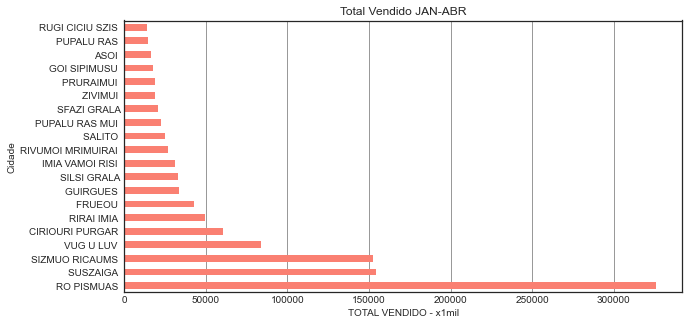

In [140]:
top_pr = PR.groupby('store_name')['QuantiaPaga'].sum()
top_pr = top_pr.sort_values(ascending=False).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 20 por faturamento
plt.figure(figsize=(10,5))
top_pr.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - x1mil')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [136]:
PR.columns

Index(['payment_method', 'channel_name', 'channel_type', 'order_id',
       'store_id', 'order_created_hour', 'order_created_day',
       'order_created_year', 'delivery_id', 'driver_id',
       'delivery_distance_meters', 'driver_modal', 'driver_type', 'hub_id',
       'hub_name', 'hub_city', 'hub_state', 'hub_latitude', 'hub_longitude',
       'store_name', 'store_segment', 'store_plan_price', 'store_latitude',
       'store_longitude', 'QuantiaPaga', 'TaxaPgmto', 'ValorPedido',
       'TaxaEntrega', 'CustoEntregaPed', 'MesVenda', 'CustosDir', 'DifPedPago',
       'Margem'],
      dtype='object')

In [141]:
# Total faturado no período R$
RS['QuantiaPaga'].sum()

1698892.38

In [127]:
RS['MesVenda'].value_counts()

Abril        9465
Março        9076
Fevereiro    7218
Janeiro      6920
Name: MesVenda, dtype: int64

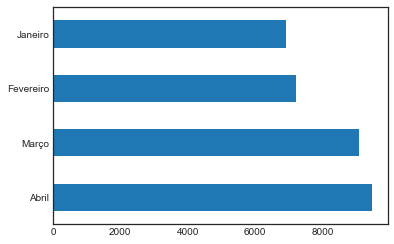

In [128]:
# Volume de venda
RS['MesVenda'].value_counts().plot(kind='barh');

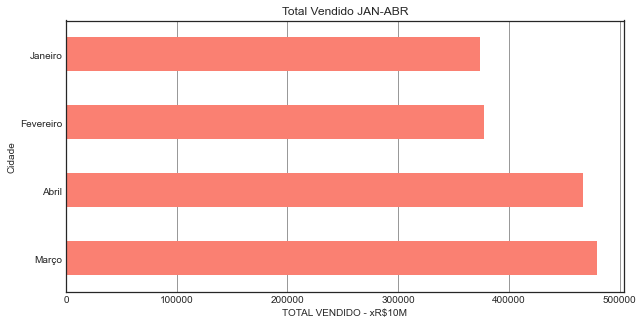

In [142]:
top_rs = RS.groupby('MesVenda')['QuantiaPaga'].sum()
top_rs = top_rs.sort_values(ascending=False)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_rs.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [143]:
# Top 20 Cliente no Paraná por faturamento
top_r = RS.groupby('store_name')['QuantiaPaga'].sum()
top_r = top_pr.sort_values(ascending=False).head(20)
top_r

store_name
RO PISMUAS            325522.88
SUSZAIGA              154445.75
SIZMUO RICAUMS        152465.51
VUG U LUV              84138.03
CIRIOURI PURGAR        60661.50
RIRAI IMIA             49616.30
FRUEOU                 42674.60
GUIRGUES               33365.31
SILSI GRALA            33063.13
IMIA VAMOI RISI        31247.55
RIVUMOI MRIMUIRAI      26916.20
SALITO                 25117.41
PUPALU RAS MUI         22319.64
SFAZI GRALA            21022.30
ZIVIMUI                19001.77
PRURAIMUI              18942.62
GOI SIPIMUSU           17959.63
ASOI                   16241.86
PUPALU RAS             14501.10
RUGI CICIU SZIS        13944.68
Name: QuantiaPaga, dtype: float64

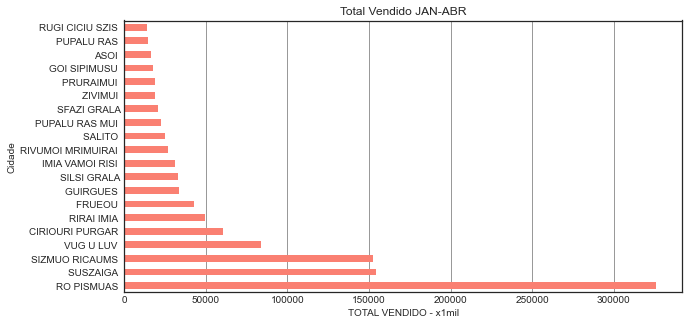

In [144]:
plt.figure(figsize=(10,5))
top_r.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - x1mil')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

* O RS também tem uma dependência de um único cliente.

In [145]:
# Total faturado no período R$
SP['QuantiaPaga'].sum()

9104086.84

In [129]:
# Volume de pedidos
SP['MesVenda'].value_counts()

Março        42389
Abril        40977
Janeiro      25397
Fevereiro    25061
Name: MesVenda, dtype: int64

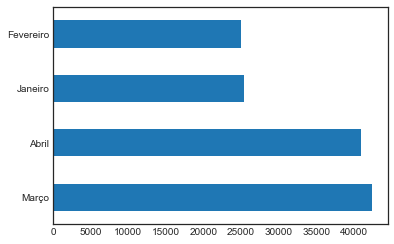

In [130]:
SP['MesVenda'].value_counts().plot(kind='barh');

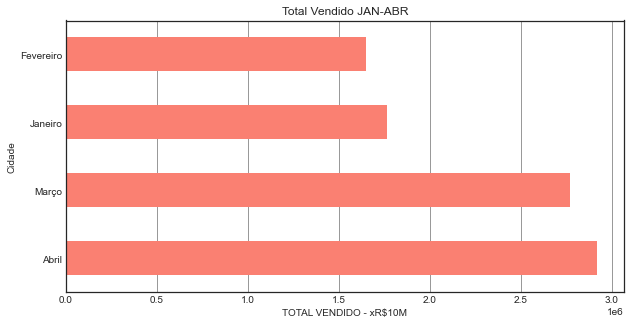

In [146]:
top_sp = SP.groupby('MesVenda')['QuantiaPaga'].sum()
top_sp = top_sp.sort_values(ascending=False)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_sp.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [163]:
# Top 20 Cliente no Paraná por faturamento
top_sp = SP.groupby('store_name')['QuantiaPaga'].sum()
top_sp = top_sp.sort_values(ascending=False).head(20)
top_sp

store_name
IUMPICA             3924346.62
PAZZI ZUM            725655.38
PIGUE PIPACO         712568.78
IPUPIEMAI            633453.60
SALITO               258730.79
EAVAMI FIGOI         233821.97
ISIM                 220598.61
SUPSIO               157675.52
ISIM O RIRARIRA      136560.29
GUMOUA E ISIM        136512.99
SPILUMI              136356.25
PIPRU SUIM           133163.78
ZUPULAR MUC          127186.29
MUMRIFAM             123608.88
SR SIGIRIMI          101470.50
ARE TRAMUO            97726.62
UVURUSM               86375.38
CIRACIOU              70484.61
AR TRAMUO             61530.23
CICI PIRPU            61091.51
Name: QuantiaPaga, dtype: float64

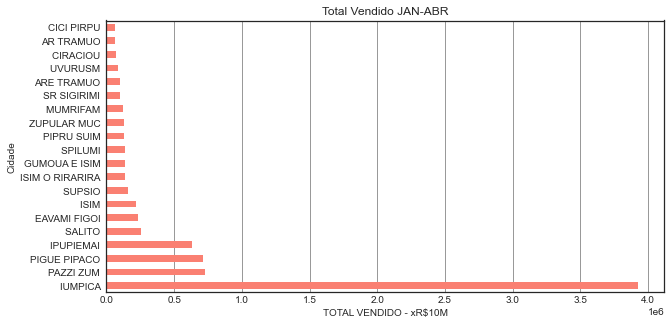

In [164]:
plt.figure(figsize=(10,5))
top_sp.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [165]:
# Tirando os 4 primeiros
top_sp = SP.groupby('store_name')['QuantiaPaga'].sum()
top_sp = top_sp.sort_values(ascending=False).head(20)[4:20:]
top_sp

store_name
SALITO              258730.79
EAVAMI FIGOI        233821.97
ISIM                220598.61
SUPSIO              157675.52
ISIM O RIRARIRA     136560.29
GUMOUA E ISIM       136512.99
SPILUMI             136356.25
PIPRU SUIM          133163.78
ZUPULAR MUC         127186.29
MUMRIFAM            123608.88
SR SIGIRIMI         101470.50
ARE TRAMUO           97726.62
UVURUSM              86375.38
CIRACIOU             70484.61
AR TRAMUO            61530.23
CICI PIRPU           61091.51
Name: QuantiaPaga, dtype: float64

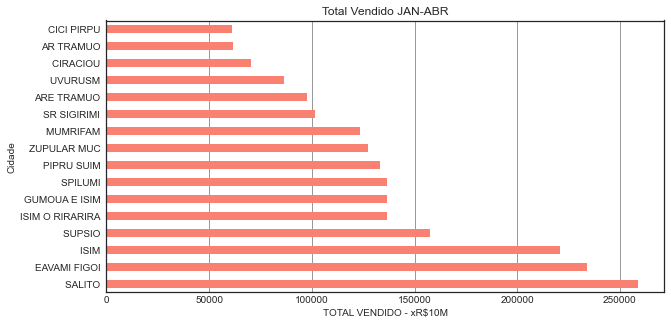

In [166]:
plt.figure(figsize=(10,5))
top_sp.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

* Os maiores clientes da empresa encontram-se em SP.

In [131]:
RJ['MesVenda'].value_counts()

Março        36117
Abril        30931
Janeiro      29025
Fevereiro    28094
Name: MesVenda, dtype: int64

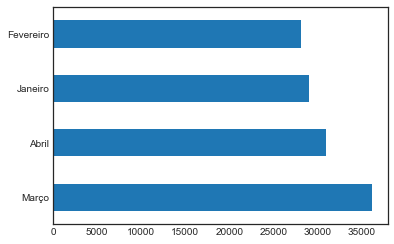

In [132]:
RJ['MesVenda'].value_counts().plot(kind='barh');

In [168]:
# Total faturado no período R$
RJ['QuantiaPaga'].sum()

8143010.93

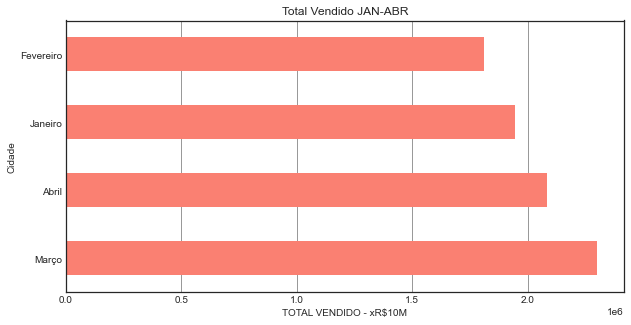

In [169]:
top_sp = RJ.groupby('MesVenda')['QuantiaPaga'].sum()
top_sp = top_sp.sort_values(ascending=False)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_sp.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

In [170]:
# Top 20 Cliente no Paraná por faturamento
top_sp = RJ.groupby('store_name')['QuantiaPaga'].sum()
top_sp = top_sp.sort_values(ascending=False).head(20)
top_sp

store_name
IUMPICA                2358337.80
PAPA SUCIS             1363243.50
RC OUMILEES             604755.06
IPUPIEMAI               475963.49
LUPIMUIM                200462.24
PALLO MZU GRALA         192504.11
CIRIROI U CAI           174501.17
SALITO                  170193.88
LUCITA                  158303.74
ZIM M MUMEUR            145171.44
SUPSIO                  143964.24
PILIOU RAS              141753.29
USPUMUI CIRAICI         128766.94
RIMAI EU TRAPRISCI      124709.83
SIRVUMU AMILAI          119333.90
SPILUMI                 116317.83
CILAFIRMAI CIOLA         89241.78
PIMRIMA                  83123.88
GIMA                     78029.60
CICIU SZIS               75672.00
Name: QuantiaPaga, dtype: float64

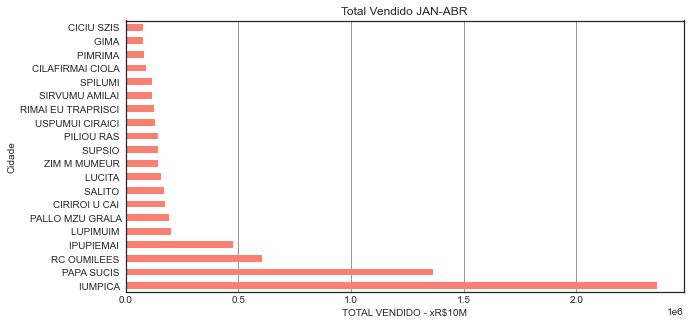

In [171]:
plt.figure(figsize=(10,5))
top_sp.plot(kind='barh', color='salmon')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('TOTAL VENDIDO - xR$10M')
plt.ylabel('Cidade')
plt.grid(axis='x', color='gray')
plt.show();

### Demais insights

In [172]:
dados.sample(3)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem
246189,ONLINE,CHOCO PLACE,OWN CHANNEL,87441072,1093,16,1,2021,2832763,10614.0,6971.0,MOTOBOY,LOGISTIC OPERATOR,36,BLACK SHOPPING,PORTO ALEGRE,RS,-30.085743,-51.245997,SALITO,GOOD,29.000000,-30.085743,-51.245997,74.70,1.49,74.70,0.0,5.74,Abril,-7.23,0.0,0.903213
27680,ONLINE,FOOD PLACE,MARKETPLACE,78268596,3105,0,17,2021,2465097,9022.0,1452.0,BIKER,FREELANCE,27,SAMPA SHOPPING,SÃO PAULO,SP,-23.622995,-46.699204,PIGUE PIPACO,FOOD,49.900000,-23.622995,-46.699204,61.05,0.92,61.05,0.0,6.00,Fevereiro,-6.92,0.0,0.886650
20251,ONLINE,FOOD PLACE,MARKETPLACE,70509446,707,20,10,2021,2228472,25651.0,2355.0,MOTOBOY,LOGISTIC OPERATOR,33,COFFEE SHOPPING,SÃO PAULO,SP,-23.579067,-46.592820,IUMPICA,FOOD,30.875996,-23.579067,-46.594006,98.30,2.65,86.40,11.9,8.00,Janeiro,-22.55,11.9,0.739005


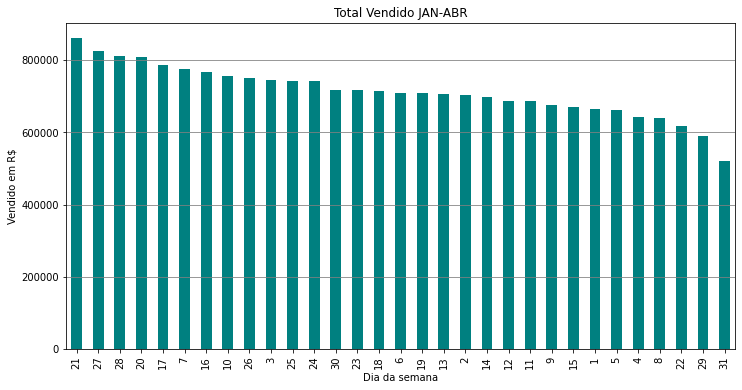

In [ ]:
top_d = dados.groupby('order_created_day')['order_amount'].sum()
top_d = top_d.sort_values(ascending=False)

# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(12,6))
top_d.plot(kind='bar', color='teal')
plt.title('Total Vendido JAN-ABR')
plt.xlabel('Dia da semana')
plt.ylabel('Vendido em R$')
plt.grid(axis='y', color='gray')
plt.show();

In [ ]:
# Dias que mais vendem
top_d.head(10)

order_created_day
21    860140.82
27    826183.56
28    811014.97
20    808647.16
17    786512.25
7     775988.02
16    766563.83
10    755489.56
26    750852.55
3     745783.63
Name: order_amount, dtype: float64

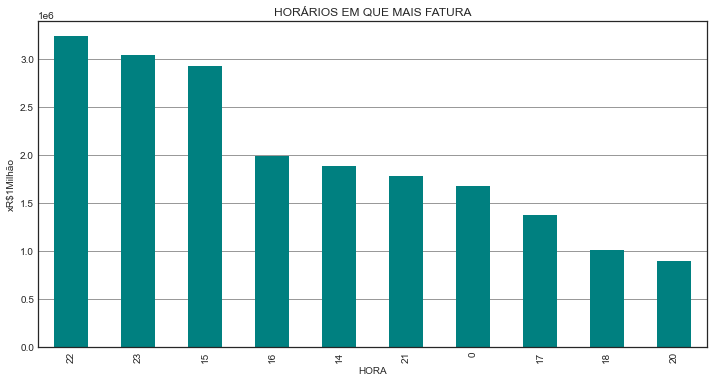

In [177]:
top_hr = dados.groupby('order_created_hour')['ValorPedido'].sum()
top_hr = top_hr.sort_values(ascending=False).head(10)

# Gráfico dos TOP 10 
plt.figure(figsize=(12,6))
top_hr.plot(kind='bar', color='teal')
plt.title('HORÁRIOS EM QUE MAIS FATURA')
plt.xlabel('HORA')
plt.ylabel('xR$1Milhão')
plt.grid(axis='y', color='gray')
plt.show();

In [176]:
top_hr.round(2)

order_created_hour
22    3230796.68
23    3042608.21
15    2918695.65
16    1987604.31
14    1885058.70
21    1778133.99
0     1677066.85
17    1375200.52
18    1009403.41
20     898264.45
Name: ValorPedido, dtype: float64

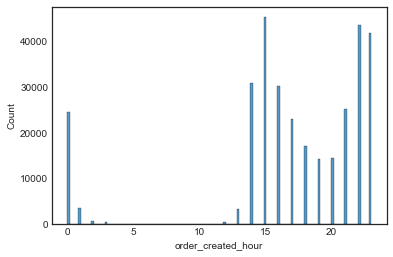

In [180]:
sns.histplot(dados['order_created_hour']);

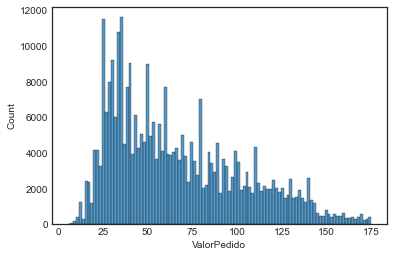

In [181]:
sns.histplot(dados['ValorPedido']);

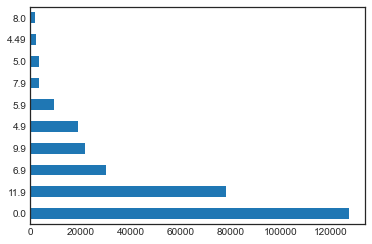

In [193]:
# Quantidade predominante dos valores das taxas
dados['TaxaEntrega'].value_counts(ascending=False).head(10).plot(kind='barh');

In [197]:
# Resumo grafico formas de pagamento
dados['payment_method'].value_counts()#.plot(kind='barh');

ONLINE                      245298
VOUCHER                      44630
DEBIT                        11089
MEAL_BENEFIT                  6168
CREDIT                        3974
STORE_DIRECT_PAYMENT          2905
DEBIT_STORE                   1548
PAYMENT_LINK                  1072
MONEY                          937
CREDIT_STORE                   884
VOUCHER_STORE                  777
VOUCHER_DC                     231
BANK_TRANSFER_DC               227
VOUCHER_OL                     189
INSTALLMENT_CREDIT_STORE        58
Name: payment_method, dtype: int64

In [ ]:
# Canais
dados['channel_name'].value_counts()
#sns.histplot(dados['channel_name']).set_title('payment_fee');

FOOD PLACE        275791
EATS PLACE         15680
VELOCITY PLACE      8312
OTHER PLACE         5352
LISBON PLACE        5007
CHOCO PLACE         4281
LONDON PLACE        3511
WHATS PLACE         2045
BRAZIL PLACE        1416
SHOPP PLACE         1001
RONALD PLACE         754
THINK PLACE          570
OWN PLACE            444
REGISTER PLACE       441
STORE PLACE          210
READY PLACE          178
PHONE PLACE          164
BERLIN PLACE         142
SEARCH PLACE         127
PANCEPS PLACE         87
MADRID PLACE          86
MUNICH PLACE          83
ALL PLACE             25
CENTER PLACE          25
SAN PLACE             20
FULL PLACE            20
SUPER PLACE           13
BEATLES PLACE          6
GLUB PLACE             5
WEAR PLACE             2
SPEED PLACE            2
ATCHIN PLACE           1
ON PLACE               1
CAICAI PLACE           1
FACE PLACE             1
RIBA PLACE             1
PORTO PLACE            0
AHORA PLACE            0
Name: channel_name, dtype: int64

In [198]:
# Por onde o cliente acessa pra comprar
dados.channel_type.value_counts()#.plot(kind='pie');

MARKETPLACE    303218
OWN CHANNEL     16769
Name: channel_type, dtype: int64

In [199]:
dados.head(3)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem
1,ONLINE,BRAZIL PLACE,MARKETPLACE,70804201,2181,11,12,2021,2236161,14059.0,1612.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,42.01,0.84,42.0,0.01,6.00,Janeiro,-6.85,0.01,0.836905
2,ONLINE,BRAZIL PLACE,MARKETPLACE,70861023,2181,17,12,2021,2238263,1015.0,4085.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,29.91,0.60,29.9,0.01,10.76,Janeiro,-11.37,0.01,0.619732
3,ONLINE,BRAZIL PLACE,MARKETPLACE,71004800,2181,14,13,2021,2241562,6675.0,1743.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,62.91,1.26,62.9,0.01,6.00,Janeiro,-7.27,0.01,0.884420


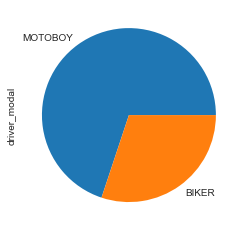

In [202]:
dados.driver_modal.value_counts().plot(kind='pie');

In [204]:
# Quantidade de pedidos por Hub
dados.hub_name.value_counts().head(10)

GOLDEN SHOPPING     43799
GREEN SHOPPING      20510
HIP HOP SHOPPING    19408
SUBWAY SHOPPING     18519
PAGODE SHOPPING     18358
RAP SHOPPING        16548
PEOPLE SHOPPING     15984
COFFEE SHOPPING     15795
BEACH SHOPPING      13897
SMALL SHOPPING      13622
Name: hub_name, dtype: int64

* Bem diversificado.

In [207]:
dados.store_segment.value_counts()

FOOD    302273
GOOD     17714
Name: store_segment, dtype: int64

In [208]:
dados.head(2)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem
1,ONLINE,BRAZIL PLACE,MARKETPLACE,70804201,2181,11,12,2021,2236161,14059.0,1612.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,42.01,0.84,42.0,0.01,6.00,Janeiro,-6.85,0.01,0.836905
2,ONLINE,BRAZIL PLACE,MARKETPLACE,70861023,2181,17,12,2021,2238263,1015.0,4085.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,29.91,0.60,29.9,0.01,10.76,Janeiro,-11.37,0.01,0.619732


###  Segmentação de clientes

Separando os clientes para utilizar campanhas e estratégias de marketing diferentes para cada cluster.

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [210]:
# Features for clustering
clientes = dados.groupby('store_name').agg({'ValorPedido': ['mean','sum','max']})
data = pd.DataFrame(clientes)
data.columns = ['Mean', 'Sum','Max']
data

,Mean,Sum,Max
store_name,,,
ACULIS MRAMIM,131.000000,262.00,156.00
AIEMAMIMU IU PRUSEM,92.228886,30619.99,172.14
AMUARASSARA,99.400000,497.00,139.00
AR CIM,49.880000,249.40,119.80
AR FAM,23.533333,211.80,30.00
...,...,...,...
ZURAMG CIMUMU,110.834286,775.84,171.98
ZURAMG CIPICIPIMI,69.990000,69.99,69.99
ZURAMG GAES,115.826061,3822.26,170.98


In [211]:
features = clientes.values

In [213]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 1.53968058, -0.16277294,  0.34941653],
       [ 0.38735388, -0.07225277,  0.76046946],
       [ 0.6004885 , -0.16207222, -0.08353885],
       ...,
       [ 1.08869185, -0.15215711,  0.73092662],
       [ 0.76625887, -0.16230209,  0.45026967],
       [ 1.53010372, -0.16004731,  0.70342122]])

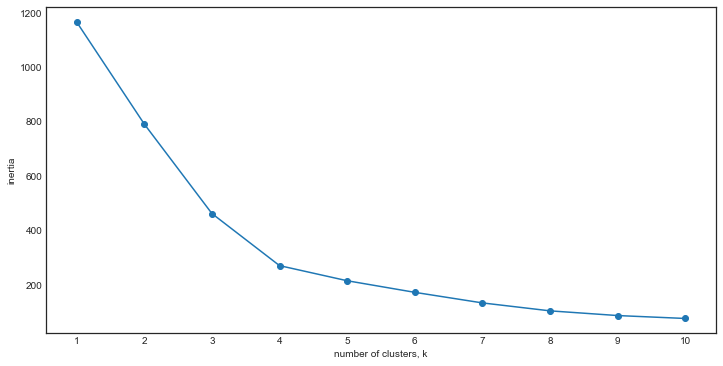

In [214]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(scaled_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [215]:
MODEL = KMeans(n_clusters=4)
MODEL.fit(scaled_features)

KMeans(n_clusters=4)

In [216]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,Mean,Sum,Max,Cluster
store_name,,,,
ACULIS MRAMIM,131.000000,262.00,156.00,3
AIEMAMIMU IU PRUSEM,92.228886,30619.99,172.14,0
AMUARASSARA,99.400000,497.00,139.00,3
AR CIM,49.880000,249.40,119.80,1
AR FAM,23.533333,211.80,30.00,1


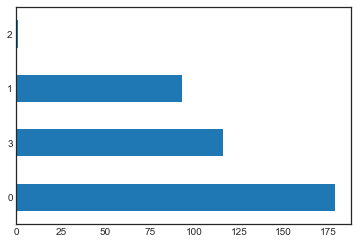

In [220]:
data.Cluster.value_counts().plot(kind='barh');

In [236]:
data.sample(12)

,Mean,Sum,Max,Cluster
store_name,,,,
CLUPU RULASSI,110.472391,10163.46,169.90,3
GOI SIPIMUSU,82.882520,20389.10,174.70,0
MISQUAMZI DA USQUAMI,33.600000,33.60,33.60,1
RUMAR,97.325000,2141.15,161.91,3
RUMOU VUREU,125.000000,125.00,125.00,3
SFAZI GRALA,51.582648,22593.20,154.30,0
SURIMRI,149.990000,149.99,149.99,3
SIMUI LIMOI,133.233333,799.40,169.90,3
GUIAPUCI PURGUR,34.795336,59465.23,150.00,0


In [237]:
data['Cluster'] = data['Cluster'].map({2:'Melhor Cliente', 0: 'ouro', 3: 'prata', 1:'bronze'})
data.head(4)

,Mean,Sum,Max,Cluster
store_name,,,,
ACULIS MRAMIM,131.000000,262.00,156.00,prata
AIEMAMIMU IU PRUSEM,92.228886,30619.99,172.14,ouro
AMUARASSARA,99.400000,497.00,139.00,prata
AR CIM,49.880000,249.40,119.80,bronze


In [238]:
data.to_csv('class_cliente.csv')

### Modelo 2

In [293]:
dados['MesN'] = dados['MesVenda'].map({'Janeiro':'01','Fevereiro':'02','Março':'03','Abril':'04'})
cols = ['order_created_year','MesN','order_created_day']
dados['combined'] = dados[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dados.head(3)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem,combined,MesN
1,ONLINE,BRAZIL PLACE,MARKETPLACE,70804201,2181,11,12,2021,2236161,14059.0,1612.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,42.01,0.84,42.0,0.01,6.00,Janeiro,-6.85,0.01,0.836905,2021-01-12,01
2,ONLINE,BRAZIL PLACE,MARKETPLACE,70861023,2181,17,12,2021,2238263,1015.0,4085.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,29.91,0.60,29.9,0.01,10.76,Janeiro,-11.37,0.01,0.619732,2021-01-12,01
3,ONLINE,BRAZIL PLACE,MARKETPLACE,71004800,2181,14,13,2021,2241562,6675.0,1743.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,62.91,1.26,62.9,0.01,6.00,Janeiro,-7.27,0.01,0.884420,2021-01-13,01


In [294]:
#dados['combined'] = dados['combined'].astype(datetime)
dados['dtv'] = pd.to_datetime(dados['combined'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319987 entries, 1 to 325804
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   payment_method            319987 non-null  object        
 1   channel_name              319987 non-null  object        
 2   channel_type              319987 non-null  object        
 3   order_id                  319987 non-null  int64         
 4   store_id                  319987 non-null  int64         
 5   order_created_hour        319987 non-null  int64         
 6   order_created_day         319987 non-null  int64         
 7   order_created_year        319987 non-null  int64         
 8   delivery_id               319987 non-null  int64         
 9   driver_id                 319987 non-null  float64       
 10  delivery_distance_meters  319987 non-null  float64       
 11  driver_modal              319987 non-null  object        
 12  dr

In [295]:
dados.head(3)

,payment_method,channel_name,channel_type,order_id,store_id,order_created_hour,order_created_day,order_created_year,delivery_id,driver_id,delivery_distance_meters,driver_modal,driver_type,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,store_name,store_segment,store_plan_price,store_latitude,store_longitude,QuantiaPaga,TaxaPgmto,ValorPedido,TaxaEntrega,CustoEntregaPed,MesVenda,CustosDir,DifPedPago,Margem,combined,MesN,dtv
1,ONLINE,BRAZIL PLACE,MARKETPLACE,70804201,2181,11,12,2021,2236161,14059.0,1612.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,42.01,0.84,42.0,0.01,6.00,Janeiro,-6.85,0.01,0.836905,2021-01-12,01,2021-01-12
2,ONLINE,BRAZIL PLACE,MARKETPLACE,70861023,2181,17,12,2021,2238263,1015.0,4085.0,MOTOBOY,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,29.91,0.60,29.9,0.01,10.76,Janeiro,-11.37,0.01,0.619732,2021-01-12,01,2021-01-12
3,ONLINE,BRAZIL PLACE,MARKETPLACE,71004800,2181,14,13,2021,2241562,6675.0,1743.0,BIKER,FREELANCE,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.88582,-43.279218,LILI CISRUMACS,GOOD,29.0,-22.887521,-43.283366,62.91,1.26,62.9,0.01,6.00,Janeiro,-7.27,0.01,0.884420,2021-01-13,01,2021-01-13


In [296]:
dia = dados.groupby('dtv')['ValorPedido'].sum()
dia.head(3)

dtv
2021-01-01     67885.43
2021-01-02    154269.43
2021-01-03    192517.92
Name: ValorPedido, dtype: float64

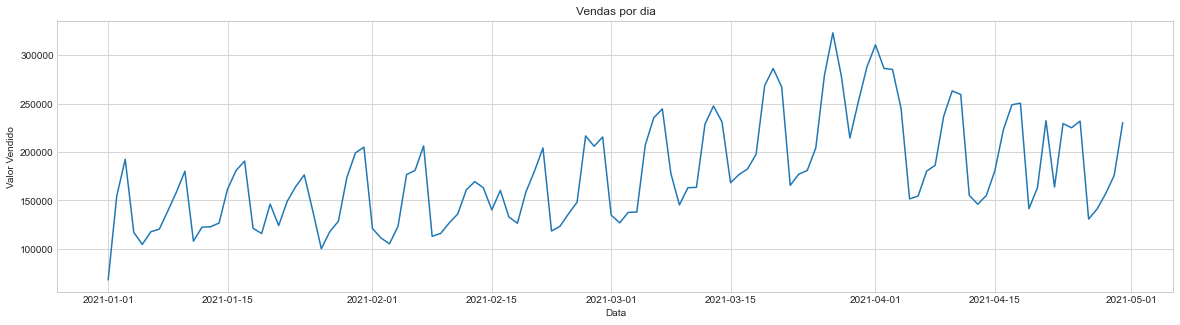

In [301]:
# Plotando o gráfico das vendas diárias
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
plt.title("Vendas por dia")
plt.xlabel("Data")
plt.ylabel("Valor Vendido")
plt.plot(dia)
plt.show();

In [307]:
dia1 = pd.DataFrame()
dia1 = dados[['ValorPedido', 'dtv']]
dia1.head(3)

,ValorPedido,dtv
1,42.0,2021-01-12
2,29.9,2021-01-12
3,62.9,2021-01-13


In [308]:
dia1.shape

(319987, 2)

#### Rodando..

In [309]:
from autots import AutoTS # biblioteca do algorítmo
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=60)
model = model.fit(dia1, date_col='dtv', value_col='ValorPedido', id_col=None)

# Modelo de Regressão Logística:
prediction = model.predict()
forecast = prediction.forecast

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 3: AverageValueNaive
Model Number: 4 with model DatepartRegression in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 20
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 9 with model ETS in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 9: ETS
Model Number: 10 with model GLM in generation 0 of 20
Model Number: 11 with model GLM in generation 0 of 20
Model Number: 12 with model GLS in generation 0 of 20
Model Number: 13 with model GLS in generation 0 of 20
Model Number: 14 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 14: GluonTS
Model Number: 15 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 15: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 16: GluonTS
Model Number: 17 with model GluonTS i

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 47 with model ZeroesNaive in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 47: ZeroesNaive
Model Number: 48 with model RollingRegression in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 48: RollingRegression
Model Number: 49 with model UnobservedComponents in generation 0 of 20
Model Number: 50 with model LastValueNaive in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 50: LastValueNaive
Model Number: 51 with model UnivariateRegression in generation 0 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 51: UnivariateRegression
Model Number: 52 with model UnobservedComponents in generation 0 of 20
Model Number: 53 with model DatepartRegression in generation 0 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 54 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 54: VAR
Model Number: 55 with model GLM in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 55: GLM
Model Number: 56 with model ETS in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 56: ETS
Model Number: 57 with model GLS in generation 0 of 20
Model Number: 58 with model GLS in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 58: GLS
Model Number: 59 with model UnobservedComponents in generation 0 of 20
Model Number: 60 with model UnivariateRegression in generation 0 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 60: UnivariateRegression
Model Number: 61 with model GluonTS in generation 0 of 20

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 75 with model AverageValueNaive in generation 0 of 20
Model Number: 76 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 76: GluonTS
Model Number: 77 with model ETS in generation 0 of 20
Model Number: 78 with model GluonTS in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 78: GluonTS

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



Model Number: 79 with model SeasonalNaive in generation 0 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 79: SeasonalNaive
New Generation: 1 of 20
Model Number: 80 with model SeasonalNaive in generation 1 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 80: SeasonalNaive
Model Number: 81 with model SeasonalNaive in generation 1 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 81: SeasonalNaive
Model Number: 82 with model SeasonalNaive in generation 1 of 20
Model Number: 83 with model SeasonalNaive in generation 1 of 20
Model Number: 84 with model GLS in generation 1 of 20
Model Number: 85 with model GLS in generation 1 of 20
Model Number: 86 with model GLS in generation 1 of 20
Model Number: 87 with model LastValueNaive in generation 1 of 20
Model Number: 88 with model LastValueNaive in generation 1 of 20
Model Number

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 92 with model ETS in generation 1 of 20
Model Number: 93 with model ETS in generation 1 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 94 with model ZeroesNaive in generation 1 of 20
Model Number: 95 with model ZeroesNaive in generation 1 of 20
Model Number: 96 with model ZeroesNaive in generation 1 of 20
Model Number: 97 with model DatepartRegression in generation 1 of 20
Model Number: 98 with model DatepartRegression in generation 1 of 20
Model Number: 99 with model DatepartRegression in generation 1 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 100 with model UnobservedComponents in generation 1 of 20
Model Number: 101 with model UnobservedComponents in generation 1 of 20
Model Number: 102 with model UnobservedComponents in generation 1 of 20
Model Number: 103 with model GLM in generation 1 of 20
Model Number: 104 with model GLM in generation 1 of 20
Model Number: 105 with model GLM in generation 1 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 105: GLM
Model Number: 106 with model GLM in generation 1 of 20
Model Number: 107 with model AverageValueNaive in generation 1 of 20
Model Number: 108 with model AverageValueNaive in generation 1 of 20
Model Number: 109 with model AverageValueNaive in generation 1 of 20
Model Number: 110 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 110: WindowRegression
Model Number: 111 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError('at least one array or dtype is required') in model 111: WindowRegression
Model Number: 112 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 112: 

D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 147 with model DatepartRegression in generation 2 of 20
Model Number: 148 with model DatepartRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 149 with model ETS in generation 2 of 20
Model Number: 150 with model ETS in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 151 with model ETS in generation 2 of 20
Model Number: 152 with model ETS in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 153 with model ZeroesNaive in generation 2 of 20
Model Number: 154 with model ZeroesNaive in generation 2 of 20
Model Number: 155 with model UnobservedComponents in generation 2 of 20
Model Number: 156 with model UnobservedComponents in generation 2 of 20
Model Number: 157 with model UnobservedComponents in generation 2 of 20
Model Number: 158 with model GLM in generation 2 of 20
Model Number: 159 with model GLM in generation 2 of 20
Model Number: 160 with model GLM in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 161 with model GLM in generation 2 of 20
Model Number: 162 with model RollingRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 163 with model RollingRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 164 with model RollingRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.regr = self.regr.fit(X, Y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | el

Model Number: 165 with model RollingRegression in generation 2 of 20
Model Number: 166 with model AverageValueNaive in generation 2 of 20
Model Number: 167 with model AverageValueNaive in generation 2 of 20
Model Number: 168 with model AverageValueNaive in generation 2 of 20
Model Number: 169 with model WindowRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 170 with model WindowRegression in generation 2 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 170: WindowRegression
Model Number: 171 with model WindowRegression in generation 2 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 171: WindowRegression
Model Number: 172 with model WindowRegression in generation 2 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 172: WindowRegression
Model Number: 173 with model GluonTS in generation 2 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 173: GluonTS
Model Number: 174 with model GluonTS in generation 2 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 174: GluonTS
Model Number: 175 with model GluonTS in generation 2 o

D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:441: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "hidden_layer_sizes": np.random.choice(


Model Number: 193 with model SeasonalNaive in generation 3 of 20
Model Number: 194 with model SeasonalNaive in generation 3 of 20
Model Number: 195 with model SeasonalNaive in generation 3 of 20
Model Number: 196 with model SeasonalNaive in generation 3 of 20
Model Number: 197 with model DatepartRegression in generation 3 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 198 with model DatepartRegression in generation 3 of 20
Template Eval Error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\\a\\1\\s\\python-package\\compile\\src\\boosting\\rf.hpp, line 35 .\n') in model 198: DatepartRegression
Model Number: 199 with model DatepartRegression in generation 3 of 20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 206 with model RollingRegression in generation 3 of 20
Model Number: 207 with model LastValueNaive in generation 3 of 20
Model Number: 208 with model LastValueNaive in generation 3 of 20
Model Number: 209 with model LastValueNaive in generation 3 of 20
Model Number: 210 with model GLM in generation 3 of 20
Model Number: 211 with model GLM in generation 3 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 211: GLM
Model Number: 212 with model GLM in generation 3 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 213 with model GLM in generation 3 of 20
Template Eval Error: ValueError('Length mismatch: Expected axis has 1 elements, new values have 51 elements') in model 213: GLM
Model Number: 214 with model ETS in generation 3 of 20
Model Number: 215 with model ETS in generation 3 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 215: ETS
Model Number: 216 with model ETS in generation 3 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(


Model Number: 217 with model ETS in generation 3 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 217: ETS
Model Number: 218 with model ZeroesNaive in generation 3 of 20
Model Number: 219 with model ZeroesNaive in generation 3 of 20
Model Number: 220 with model ZeroesNaive in generation 3 of 20
Model Number: 221 with model AverageValueNaive in generation 3 of 20
Model Number: 222 with model AverageValueNaive in generation 3 of 20
Model Number: 223 with model AverageValueNaive in generation 3 of 20
Model Number: 224 with model UnobservedComponents in generation 3 of 20
Model Number: 225 with model UnobservedComponents in generation 3 of 20
Model Number: 226 with model UnobservedComponents in generation 3 of 20
Model Number: 227 with model WindowRegression in generation 3 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 227: WindowRegression
Model Number: 228 w

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 228: WindowRegression
Model Number: 229 with model WindowRegression in generation 3 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 229: WindowRegression
Model Number: 230 with model WindowRegression in generation 3 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 230: WindowRegression
Model Number: 231 with model GluonTS in generation 3 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 231: GluonTS
Model Number: 232 with model GluonTS in generation 3 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 232: GluonTS
Model Number: 233 with model GluonTS in generation 3 o

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)



Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 243: UnivariateRegression
Model Number: 244 with model UnivariateRegression in generation 3 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 244: UnivariateRegression
Model Number: 245 with model UnivariateRegression in generation 3 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 245: UnivariateRegression
Model Number: 246 with model UnivariateRegression in generation 3 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 246: UnivariateRegression
Model Number: 247 with model FBProphet in generation 3 of 20
Template Eval Error: ImportError('Package fbprophet is required') in model 247: FBProphet
Model Number: 248 with model FBProphet in generation 3 of 20
Template Eval Error: ImportError('Package fbprophet is 

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 251: SeasonalNaive
Model Number: 252 with model SeasonalNaive in generation 4 of 20
Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series') in model 252: SeasonalNaive
Model Number: 253 with model SeasonalNaive in generation 4 of 20
Model Number: 254 with model SeasonalNaive in generation 4 of 20
Model Number: 255 with model DatepartRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 256 with model DatepartRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 257 with model DatepartRegression in generation 4 of 20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Template Eval Error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\\a\\1\\s\\python-package\\compile\\src\\boosting\\rf.hpp, line 35 .\n') in model 257: DatepartRegression
Model Number: 258 with model GLS in generation 4 of 20
Model Number: 259 with model GLS in generation 4 of 20
Model Number: 260 with model GLS in generation 4 of 20
Model Number: 261 with model RollingRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 262 with model RollingRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 263 with model RollingRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 264 with model RollingRegression in generation 4 of 20
Model Number: 265 with model LastValueNaive in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series') in model 265: LastValueNaive
Model Number: 266 with model LastValueNaive in generation 4 of 20
Model Number: 267 with model GLM in generation 4 of 20
Model Number: 268 with model GLM in generation 4 of 20
Model Number: 269 with model GLM in generation 4 of 20
Model Number: 270 with model GLM in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 271 with model UnobservedComponents in generation 4 of 20
Model Number: 272 with model UnobservedComponents in generation 4 of 20
Model Number: 273 with model UnobservedComponents in generation 4 of 20
Model Number: 274 with model ETS in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(


Model Number: 275 with model ETS in generation 4 of 20
Model Number: 276 with model ETS in generation 4 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 276: ETS
Model Number: 277 with model ETS in generation 4 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 277: ETS
Model Number: 278 with model ZeroesNaive in generation 4 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 278: ZeroesNaive
Model Number: 279 with model ZeroesNaive in generation 4 of 20
Model Number: 280 with model ZeroesNaive in generation 4 of 20
Model Number: 281 with model AverageValueNaive in generation 4 of 20
Model Number: 282 with model AverageValueNaive in generation 4 of 20
Model Number: 283 with model AverageValueNaive in generation 4 of 20
Template Eval Error: UFuncTypeError(<ufunc 'multiply'>, 'same_kind', dtype('float64'), dtype('int32'), 2) i

D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 285 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError('at least one array or dtype is required') in model 285: WindowRegression
Model Number: 286 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError('at least one array or dtype is required') in model 286: WindowRegression
Model Number: 287 with model WindowRegression in generation 4 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 288 with model GluonTS in generation 4 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 288: GluonTS
Model Number: 289 with model GluonTS in generation 4 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 289: GluonTS
Model Number: 290 with model GluonTS in generation 4 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 290: GluonTS
Model Number: 291 with model GluonTS in generation 4 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 291: GluonTS
Model Number: 292 with model VAR in generation 4 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 292: VAR
Model Number: 293 with model VAR in generation 4 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in m

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)


Model Number: 314 with model DatepartRegression in generation 5 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 315 with model GLS in generation 5 of 20
Model Number: 316 with model GLS in generation 5 of 20
Model Number: 317 with model GLS in generation 5 of 20
Model Number: 318 with model GLM in generation 5 of 20
Model Number: 319 with model GLM in generation 5 of 20
Model Number: 320 with model GLM in generation 5 of 20
Model Number: 321 with model GLM in generation 5 of 20
Model Number: 322 with model AverageValueNaive in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 323 with model AverageValueNaive in generation 5 of 20
Model Number: 324 with model AverageValueNaive in generation 5 of 20
Model Number: 325 with model RollingRegression in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 326 with model RollingRegression in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Model Number: 327 with model RollingRegression in generation 5 of 20
Model Number: 328 with model RollingRegression in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 329 with model LastValueNaive in generation 5 of 20
Model Number: 330 with model LastValueNaive in generation 5 of 20
Model Number: 331 with model UnobservedComponents in generation 5 of 20
Model Number: 332 with model UnobservedComponents in generation 5 of 20
Model Number: 333 with model UnobservedComponents in generation 5 of 20
Model Number: 334 with model ETS in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 335 with model ETS in generation 5 of 20
Model Number: 336 with model ETS in generation 5 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 337 with model ETS in generation 5 of 20
Model Number: 338 with model ZeroesNaive in generation 5 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 338: ZeroesNaive
Model Number: 339 with model ZeroesNaive in generation 5 of 20
Model Number: 340 with model ZeroesNaive in generation 5 of 20
Model Number: 341 with model WindowRegression in generation 5 of 20
Model Number: 342 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 342: WindowRegression

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Model Number: 343 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 343: WindowRegression
Model Number: 344 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 344: WindowRegression
Model Number: 345 with model GluonTS in generation 5 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 345: GluonTS
Model Number: 346 with model GluonTS in generation 5 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 346: GluonTS
Model Number: 347 with model GluonTS in generation 5 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 347: GluonTS
Model Numb

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 370 with model DatepartRegression in generation 6 of 20
Model Number: 371 with model DatepartRegression in generation 6 of 20
Model Number: 372 with model GLS in generation 6 of 20
Model Number: 373 with model GLS in generation 6 of 20
Model Number: 374 with model GLS in generation 6 of 20
Model Number: 375 with model GLM in generation 6 of 20
Model Number: 376 with model GLM in generation 6 of 20
Model Number: 377 with model GLM in generation 6 of 20
Model Number: 378 with model GLM in generation 6 of 20
Model Number: 379 with model AverageValueNaive in generation 6 of 20
Model Number: 380 with model AverageValueNaive in generation 6 of 20
Model Number: 381 with model AverageValueNaive in generation 6 of 20
Model Number: 382 with model RollingRegression in generation 6 of 20
Model Number: 383 with model RollingRegression in generation 6 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 383: RollingRe

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 386 with model WindowRegression in generation 6 of 20
Model Number: 387 with model WindowRegression in generation 6 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 387: WindowRegression
Model Number: 388 with model WindowRegression in generation 6 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 389 with model WindowRegression in generation 6 of 20
Model Number: 390 with model LastValueNaive in generation 6 of 20
Model Number: 391 with model LastValueNaive in generation 6 of 20
Model Number: 392 with model LastValueNaive in generation 6 of 20
Model Number: 393 with model UnobservedComponents in generation 6 of 20
Model Number: 394 with model UnobservedComponents in generation 6 of 20
Model Number: 395 with model UnobservedComponents in generation 6 of 20
Model Number: 396 with model ETS in generation 6 of 20
Model Number: 397 with model ETS in generation 6 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 398 with model ETS in generation 6 of 20
Model Number: 399 with model ZeroesNaive in generation 6 of 20
Model Number: 400 with model ZeroesNaive in generation 6 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 401 with model ZeroesNaive in generation 6 of 20
Model Number: 402 with model GluonTS in generation 6 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 402: GluonTS
Model Number: 403 with model GluonTS in generation 6 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 403: GluonTS
Model Number: 404 with model GluonTS in generation 6 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 404: GluonTS
Model Number: 405 with model GluonTS in generation 6 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 405: GluonTS
Model Number: 406 with model VAR in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 406: VAR
Model N

D:\Programas\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
D:\Programas\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 407: VAR
Model Number: 408 with model VAR in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 408: VAR
Model Number: 409 with model VAR in generation 6 of 20
Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 409: VAR
Model Number: 410 with model VECM in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 410: VECM
Model Number: 411 with model VECM in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 411: VECM
Model Number: 412 with model VECM in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 412: VECM
Model Number: 413 with model VECM in generation 6 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in mod

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 428 with model GLS in generation 7 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 428: GLS
Model Number: 429 with model GLS in generation 7 of 20
Model Number: 430 with model GLS in generation 7 of 20
Model Number: 431 with model GLM in generation 7 of 20
Model Number: 432 with model GLM in generation 7 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 432: GLM
Model Number: 433 with model GLM in generation 7 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 433: GLM


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 434 with model GLM in generation 7 of 20
Model Number: 435 with model AverageValueNaive in generation 7 of 20
Model Number: 436 with model AverageValueNaive in generation 7 of 20
Model Number: 437 with model AverageValueNaive in generation 7 of 20
Model Number: 438 with model RollingRegression in generation 7 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 438: RollingRegression
Model Number: 439 with model RollingRegression in generation 7 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 439: RollingRegression
Model Number: 440 with model RollingRegression in generation 7 of 20
Model Number: 441 with model RollingRegression in generation 7 of 20
Model Number: 442 with model WindowRegression in generation 7 of 20
Template Eval Error: ValueError('at least one array or dtype is required') in model 442: WindowRegression
Model Number: 443 with mode

D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 451 with model ETS in generation 7 of 20
Model Number: 452 with model ETS in generation 7 of 20
Model Number: 453 with model UnobservedComponents in generation 7 of 20

D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(



Model Number: 454 with model UnobservedComponents in generation 7 of 20
Model Number: 455 with model UnobservedComponents in generation 7 of 20
Model Number: 456 with model ZeroesNaive in generation 7 of 20
Model Number: 457 with model ZeroesNaive in generation 7 of 20
Model Number: 458 with model ZeroesNaive in generation 7 of 20
Model Number: 459 with model GluonTS in generation 7 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 459: GluonTS
Model Number: 460 with model GluonTS in generation 7 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 460: GluonTS
Model Number: 461 with model GluonTS in generation 7 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 461: GluonTS
Model Number: 462 with model GluonTS in generation 7 of 20
Template Eval

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 484 with model DatepartRegression in generation 8 of 20
Model Number: 485 with model GLS in generation 8 of 20
Model Number: 486 with model GLS in generation 8 of 20
Model Number: 487 with model GLS in generation 8 of 20
Model Number: 488 with model GLM in generation 8 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 488: GLM
Model Number: 489 with model GLM in generation 8 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 489: GLM


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 490 with model GLM in generation 8 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 490: GLM
Model Number: 491 with model GLM in generation 8 of 20
Model Number: 492 with model WindowRegression in generation 8 of 20
Template Eval Error: XGBoostError('[18:41:10] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:419: GammaRegression: label must be positive.') in model 492: WindowRegression
Model Number: 493 with model WindowRegression in generation 8 of 20
Model Number: 494 with model WindowRegression in generation 8 of 20
Model Number: 495 with model WindowRegression in generation 8 of 20
Model Number: 496 with model AverageValueNaive in generation 8 of 20
Model Number: 497 with model AverageValueNaive in generation 8 of 20
Model Number: 498 with model AverageValueNaive in generation 8 of 20
Model Number: 499 with m

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 500 with model RollingRegression in generation 8 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 500: RollingRegression
Model Number: 501 with model RollingRegression in generation 8 of 20
Model Number: 502 with model RollingRegression in generation 8 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 502: RollingRegression
Model Number: 503 with model LastValueNaive in generation 8 of 20
Model Number: 504 with model LastValueNaive in generation 8 of 20
Model Number: 505 with model LastValueNaive in generation 8 of 20
Model Number: 506 with model ETS in generation 8 of 20


D:\Programas\Anaconda\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 507 with model ETS in generation 8 of 20
Model Number: 508 with model ETS in generation 8 of 20
Model Number: 509 with model ETS in generation 8 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 510 with model UnobservedComponents in generation 8 of 20
Model Number: 511 with model UnobservedComponents in generation 8 of 20
Model Number: 512 with model UnobservedComponents in generation 8 of 20
Model Number: 513 with model ZeroesNaive in generation 8 of 20
Model Number: 514 with model ZeroesNaive in generation 8 of 20
Model Number: 515 with model ZeroesNaive in generation 8 of 20
Model Number: 516 with model GluonTS in generation 8 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 516: GluonTS
Model Number: 517 with model GluonTS in generation 8 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 517: GluonTS
Model Number: 518 with model GluonTS in generation 8 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 518: GluonTS
M

D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:441: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "hidden_layer_sizes": np.random.choice(


Model Number: 537 with model SeasonalNaive in generation 9 of 20
Model Number: 538 with model SeasonalNaive in generation 9 of 20
Model Number: 539 with model SeasonalNaive in generation 9 of 20
Model Number: 540 with model DatepartRegression in generation 9 of 20
Model Number: 541 with model DatepartRegression in generation 9 of 20
Model Number: 542 with model DatepartRegression in generation 9 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 543 with model GLS in generation 9 of 20
Model Number: 544 with model GLS in generation 9 of 20
Model Number: 545 with model GLM in generation 9 of 20
Model Number: 546 with model GLM in generation 9 of 20
Model Number: 547 with model GLM in generation 9 of 20
Model Number: 548 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 548: WindowRegression
Model Number: 549 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 549: WindowRegression
Model Number: 550 with model WindowRegression in generation 9 of 20
Model Number: 551 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 551: WindowRegression
Model Number: 552 with model AverageValueNaive in genera

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 562 with model LastValueNaive in generation 9 of 20
Model Number: 563 with model LastValueNaive in generation 9 of 20
Model Number: 564 with model ETS in generation 9 of 20
Template Eval Error: UFuncTypeError(<ufunc 'multiply'>, 'same_kind', dtype('float64'), dtype('int32'), 2) in model 564: ETS
Model Number: 565 with model ETS in generation 9 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1439: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1445: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 566 with model ETS in generation 9 of 20
Model Number: 567 with model ETS in generation 9 of 20
Template Eval Error: UFuncTypeError(<ufunc 'multiply'>, 'same_kind', dtype('float64'), dtype('int32'), 2) in model 567: ETS
Model Number: 568 with model UnobservedComponents in generation 9 of 20
Model Number: 569 with model UnobservedComponents in generation 9 of 20
Model Number: 570 with model UnobservedComponents in generation 9 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1439: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1445: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


Model Number: 571 with model GluonTS in generation 9 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 571: GluonTS
Model Number: 572 with model GluonTS in generation 9 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 572: GluonTS
Model Number: 573 with model GluonTS in generation 9 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 573: GluonTS
Model Number: 574 with model GluonTS in generation 9 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 574: GluonTS
Model Number: 575 with model VAR in generation 9 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 575: VAR
Model Number: 576 with model VAR in generation 9 of 20
Template Eval E

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 596 with model DatepartRegression in generation 10 of 20
Model Number: 597 with model DatepartRegression in generation 10 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 598 with model GLS in generation 10 of 20
Model Number: 599 with model GLS in generation 10 of 20
Model Number: 600 with model GLM in generation 10 of 20
Model Number: 601 with model GLM in generation 10 of 20
Model Number: 602 with model GLM in generation 10 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 602: GLM
Model Number: 603 with model WindowRegression in generation 10 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 604 with model WindowRegression in generation 10 of 20
Model Number: 605 with model WindowRegression in generation 10 of 20
Model Number: 606 with model AverageValueNaive in generation 10 of 20
Model Number: 607 with model AverageValueNaive in generation 10 of 20
Model Number: 608 with model AverageValueNaive in generation 10 of 20
Model Number: 609 with model ZeroesNaive in generation 10 of 20
Model Number: 610 with model ZeroesNaive in generation 10 of 20
Model Number: 611 with model ZeroesNaive in generation 10 of 20
Model Number: 612 with model RollingRegression in generation 10 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 612: RollingRegression
Model Number: 613 with model RollingRegression in generation 10 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 613: RollingRegression
Model Number: 614 with model RollingRegres

D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 620 with model ETS in generation 10 of 20
Model Number: 621 with model ETS in generation 10 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 622 with model ETS in generation 10 of 20
Model Number: 623 with model UnobservedComponents in generation 10 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 623: UnobservedComponents
Model Number: 624 with model UnobservedComponents in generation 10 of 20
Model Number: 625 with model UnobservedComponents in generation 10 of 20
New Generation: 11 of 20
Model Number: 626 with model SeasonalNaive in generation 11 of 20
Model Number: 627 with model SeasonalNaive in generation 11 of 20
Model Number: 628 with model SeasonalNaive in generation 11 of 20
Model Number: 629 with model DatepartRegression in generation 11 of 20
Model Number: 630 with model DatepartRegression in generation 11 of 20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative')

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 632 with model GLS in generation 11 of 20
Model Number: 633 with model GLS in generation 11 of 20
Model Number: 634 with model GLS in generation 11 of 20
Model Number: 635 with model GLM in generation 11 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 635: GLM
Model Number: 636 with model GLM in generation 11 of 20
Model Number: 637 with model GLM in generation 11 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 638 with model WindowRegression in generation 11 of 20
Model Number: 639 with model WindowRegression in generation 11 of 20
Model Number: 640 with model WindowRegression in generation 11 of 20
Model Number: 641 with model AverageValueNaive in generation 11 of 20
Model Number: 642 with model AverageValueNaive in generation 11 of 20
Model Number: 643 with model AverageValueNaive in generation 11 of 20
Model Number: 644 with model ZeroesNaive in generation 11 of 20
Model Number: 645 with model ZeroesNaive in generation 11 of 20
Model Number: 646 with model ZeroesNaive in generation 11 of 20
Model Number: 647 with model RollingRegression in generation 11 of 20
Model Number: 648 with model RollingRegression in generation 11 of 20
Model Number: 649 with model RollingRegression in generation 11 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 650 with model RollingRegression in generation 11 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 650: RollingRegression
Model Number: 651 with model LastValueNaive in generation 11 of 20
Model Number: 652 with model LastValueNaive in generation 11 of 20
Model Number: 653 with model LastValueNaive in generation 11 of 20
Model Number: 654 with model ETS in generation 11 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 655 with model ETS in generation 11 of 20
Model Number: 656 with model ETS in generation 11 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 657 with model ETS in generation 11 of 20
Model Number: 658 with model UnobservedComponents in generation 11 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 659 with model UnobservedComponents in generation 11 of 20
Model Number: 660 with model UnobservedComponents in generation 11 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 660: UnobservedComponents
New Generation: 12 of 20
Model Number: 661 with model SeasonalNaive in generation 12 of 20
Model Number: 662 with model SeasonalNaive in generation 12 of 20
Model Number: 663 with model SeasonalNaive in generation 12 of 20
Model Number: 664 with model SeasonalNaive in generation 12 of 20
Model Number: 665 with model DatepartRegression in generation 12 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 666 with model DatepartRegression in generation 12 of 20
Model Number: 667 with model DatepartRegression in generation 12 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 667: DatepartRegression
Model Number: 668 with model GLS in generation 12 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 669 with model GLS in generation 12 of 20
Model Number: 670 with model GLS in generation 12 of 20
Model Number: 671 with model GLM in generation 12 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 672 with model GLM in generation 12 of 20
Model Number: 673 with model GLM in generation 12 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 674 with model GLM in generation 12 of 20
Model Number: 675 with model WindowRegression in generation 12 of 20
Model Number: 676 with model WindowRegression in generation 12 of 20
[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
Template Eval Error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\\a\\1\\s\\python-package\\compile\\src\\boosting\\rf.hpp, line 35 .\n') in model 676: WindowRegression
Model Number: 677 with model WindowRegression in generation 12 of 20
Model Number: 678 with model WindowRegression in generation 12 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 678: WindowRegression
Model Number: 679 with model AverageValueNaive in generation 12 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 679: AverageValu

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 691 with model ETS in generation 12 of 20
Model Number: 692 with model ETS in generation 12 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 693 with model UnobservedComponents in generation 12 of 20
Model Number: 694 with model UnobservedComponents in generation 12 of 20
Model Number: 695 with model UnobservedComponents in generation 12 of 20
New Generation: 13 of 20
Model Number: 696 with model SeasonalNaive in generation 13 of 20
Model Number: 697 with model SeasonalNaive in generation 13 of 20
Model Number: 698 with model SeasonalNaive in generation 13 of 20
Model Number: 699 with model SeasonalNaive in generation 13 of 20
Model Number: 700 with model DatepartRegression in generation 13 of 20
Model Number: 701 with model DatepartRegression in generation 13 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 702 with model DatepartRegression in generation 13 of 20
Model Number: 703 with model GLS in generation 13 of 20
Model Number: 704 with model GLS in generation 13 of 20
Model Number: 705 with model GLS in generation 13 of 20
Model Number: 706 with model GLM in generation 13 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 706: GLM
Model Number: 707 with model GLM in generation 13 of 20
Model Number: 708 with model GLM in generation 13 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 709 with model GLM in generation 13 of 20
Model Number: 710 with model WindowRegression in generation 13 of 20
Model Number: 711 with model WindowRegression in generation 13 of 20
Model Number: 712 with model WindowRegression in generation 13 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 712: WindowRegression
Model Number: 713 with model AverageValueNaive in generation 13 of 20
Model Number: 714 with model AverageValueNaive in generation 13 of 20
Model Number: 715 with model AverageValueNaive in generation 13 of 20
Model Number: 716 with model RollingRegression in generation 13 of 20
Model Number: 717 with model RollingRegression in generation 13 of 20
Model Number: 718 with model RollingRegression in generation 13 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 719 with model RollingRegression in generation 13 of 20
Model Number: 720 with model ZeroesNaive in generation 13 of 20
Model Number: 721 with model ZeroesNaive in generation 13 of 20
Model Number: 722 with model ZeroesNaive in generation 13 of 20
Model Number: 723 with model LastValueNaive in generation 13 of 20
Model Number: 724 with model LastValueNaive in generation 13 of 20
Model Number: 725 with model UnobservedComponents in generation 13 of 20
Model Number: 726 with model UnobservedComponents in generation 13 of 20
Model Number: 727 with model UnobservedComponents in generation 13 of 20
Model Number: 728 with model ETS in generation 13 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 729 with model ETS in generation 13 of 20
Model Number: 730 with model ETS in generation 13 of 20
New Generation: 14 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:441: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "hidden_layer_sizes": np.random.choice(


Model Number: 731 with model SeasonalNaive in generation 14 of 20
Model Number: 732 with model SeasonalNaive in generation 14 of 20
Model Number: 733 with model SeasonalNaive in generation 14 of 20
Model Number: 734 with model SeasonalNaive in generation 14 of 20
Model Number: 735 with model DatepartRegression in generation 14 of 20
Model Number: 736 with model DatepartRegression in generation 14 of 20
Model Number: 737 with model DatepartRegression in generation 14 of 20
Model Number: 738 with model GLS in generation 14 of 20
Model Number: 739 with model GLS in generation 14 of 20
Model Number: 740 with model GLS in generation 14 of 20
Model Number: 741 with model GLM in generation 14 of 20
Model Number: 742 with model GLM in generation 14 of 20
Model Number: 743 with model WindowRegression in generation 14 of 20
Model Number: 744 with model WindowRegression in generation 14 of 20
Model Number: 745 with model WindowRegression in generation 14 of 20
Model Number: 746 with model Rolling

D:\Programas\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:978: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
D:\Programas\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:978: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 763 with model ETS in generation 14 of 20
Model Number: 764 with model ETS in generation 14 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 765 with model ETS in generation 14 of 20
New Generation: 15 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:441: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "hidden_layer_sizes": np.random.choice(


Model Number: 766 with model SeasonalNaive in generation 15 of 20
Model Number: 767 with model SeasonalNaive in generation 15 of 20
Model Number: 768 with model SeasonalNaive in generation 15 of 20
Model Number: 769 with model DatepartRegression in generation 15 of 20
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

D:\Programas\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 792: UnobservedComponents
Model Number: 793 with model UnobservedComponents in generation 15 of 20
Model Number: 794 with model LastValueNaive in generation 15 of 20
Model Number: 795 with model LastValueNaive in generation 15 of 20
Model Number: 796 with model LastValueNaive in generation 15 of 20
Model Number: 797 with model ETS in generation 15 of 20
Model Number: 798 with model ETS in generation 15 of 20
Model Number: 799 with model ETS in generation 15 of 20
Model Number: 800 with model ETS in generation 15 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


New Generation: 16 of 20
Model Number: 801 with model SeasonalNaive in generation 16 of 20
Model Number: 802 with model SeasonalNaive in generation 16 of 20
Model Number: 803 with model SeasonalNaive in generation 16 of 20
Model Number: 804 with model SeasonalNaive in generation 16 of 20
Model Number: 805 with model DatepartRegression in generation 16 of 20
Model Number: 806 with model DatepartRegression in generation 16 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 807 with model DatepartRegression in generation 16 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 808 with model WindowRegression in generation 16 of 20
Model Number: 809 with model WindowRegression in generation 16 of 20
Template Eval Error: ValueError('at least one array or dtype is required') in model 809: WindowRegression
Model Number: 810 with model WindowRegression in generation 16 of 20
Model Number: 811 with model WindowRegression in generation 16 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 812 with model GLS in generation 16 of 20
Model Number: 813 with model GLS in generation 16 of 20
Model Number: 814 with model GLM in generation 16 of 20
Model Number: 815 with model GLM in generation 16 of 20
Model Number: 816 with model GLM in generation 16 of 20
Model Number: 817 with model GLM in generation 16 of 20
Model Number: 818 with model RollingRegression in generation 16 of 20
Model Number: 819 with model RollingRegression in generation 16 of 20
Model Number: 820 with model RollingRegression in generation 16 of 20
Model Number: 821 with model RollingRegression in generation 16 of 20
Model Number: 822 with model AverageValueNaive in generation 16 of 20
Model Number: 823 with model AverageValueNaive in generation 16 of 20
Model Number: 824 with model ZeroesNaive in generation 16 of 20
Model Number: 825 with model ZeroesNaive in generation 16 of 20
Model Number: 826 with model ZeroesNaive in generation 16 of 20
Model Number: 827 with model UnobservedComponents in

D:\Programas\Anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 835 with model ETS in generation 16 of 20
Model Number: 836 with model ETS in generation 16 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


New Generation: 17 of 20
Model Number: 837 with model SeasonalNaive in generation 17 of 20
Model Number: 838 with model SeasonalNaive in generation 17 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:441: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "hidden_layer_sizes": np.random.choice(


Model Number: 839 with model SeasonalNaive in generation 17 of 20
Model Number: 840 with model RollingRegression in generation 17 of 20
Model Number: 841 with model RollingRegression in generation 17 of 20
Model Number: 842 with model RollingRegression in generation 17 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 842: RollingRegression
Model Number: 843 with model RollingRegression in generation 17 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 843: RollingRegression
Model Number: 844 with model DatepartRegression in generation 17 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 845 with model DatepartRegression in generation 17 of 20
Model Number: 846 with model DatepartRegression in generation 17 of 20
Model Number: 847 with model WindowRegression in generation 17 of 20
Model Number: 848 with model WindowRegression in generation 17 of 20
Model Number: 849 with model WindowRegression in generation 17 of 20
Model Number: 850 with model WindowRegression in generation 17 of 20
Model Number: 851 with model GLS in generation 17 of 20
Model Number: 852 with model GLS in generation 17 of 20
Model Number: 853 with model GLS in generation 17 of 20
Model Number: 854 with model AverageValueNaive in generation 17 of 20
Model Number: 855 with model AverageValueNaive in generation 17 of 20
Model Number: 856 with model GLM in generation 17 of 20
Model Number: 857 with model GLM in generation 17 of 20
Model Number: 858 with model GLM in generation 17 of 20
Model Number: 859 with model GLM in generation 17 of 20
Model Number: 860 with model ZeroesNaive in genera

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 875 with model RollingRegression in generation 18 of 20
Model Number: 876 with model DatepartRegression in generation 18 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 877 with model DatepartRegression in generation 18 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Number: 878 with model DatepartRegression in generation 18 of 20
Model Number: 879 with model WindowRegression in generation 18 of 20
Model Number: 880 with model WindowRegression in generation 18 of 20
Model Number: 881 with model WindowRegression in generation 18 of 20


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1019: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.regr = self.regr.fit(X, Y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | e

Model Number: 882 with model WindowRegression in generation 18 of 20
Model Number: 883 with model GLS in generation 18 of 20
Model Number: 884 with model GLS in generation 18 of 20
Model Number: 885 with model GLS in generation 18 of 20
Model Number: 886 with model AverageValueNaive in generation 18 of 20
Model Number: 887 with model AverageValueNaive in generation 18 of 20
Model Number: 888 with model AverageValueNaive in generation 18 of 20
Model Number: 889 with model GLM in generation 18 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 890 with model GLM in generation 18 of 20
Model Number: 891 with model GLM in generation 18 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 891: GLM
Model Number: 892 with model GLM in generation 18 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 892: GLM
Model Number: 893 with model UnobservedComponents in generation 18 of 20
Model Number: 894 with model UnobservedComponents in generation 18 of 20
Model Number: 895 with model UnobservedComponents in generation 18 of 20
Model Number: 896 with model ZeroesNaive in generation 18 of 20
Model Number: 897 with model ZeroesNaive in generation 18 of 20
Model Number: 898 with model LastValueNaive in generation 18 of 20
Model Number: 899 with model LastValueNaive in generation 18 of 20
Model Number: 900 with model LastValueNaive in generation 18 of 20
New Generation: 19 of 20
Model Number: 901 with model Seas

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 912: WindowRegression
Model Number: 913 with model WindowRegression in generation 19 of 20
Model Number: 914 with model WindowRegression in generation 19 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 914: WindowRegression
Model Number: 915 with model WindowRegression in generation 19 of 20
Model Number: 916 with model GLS in generation 19 of 20
Model Number: 917 with model GLS in generation 19 of 20
Model Number: 918 with model GLS in generation 19 of 20


D:\Programas\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 918: GLS
Model Number: 919 with model AverageValueNaive in generation 19 of 20
Model Number: 920 with model AverageValueNaive in generation 19 of 20
Model Number: 921 with model AverageValueNaive in generation 19 of 20
Model Number: 922 with model GLM in generation 19 of 20
Model Number: 923 with model GLM in generation 19 of 20
Model Number: 924 with model GLM in generation 19 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 925 with model GLM in generation 19 of 20
Model Number: 926 with model UnobservedComponents in generation 19 of 20
Model Number: 927 with model UnobservedComponents in generation 19 of 20
Model Number: 928 with model UnobservedComponents in generation 19 of 20
Model Number: 929 with model ZeroesNaive in generation 19 of 20
Model Number: 930 with model LastValueNaive in generation 19 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 930: LastValueNaive
New Generation: 20 of 20
Model Number: 931 with model SeasonalNaive in generation 20 of 20
Model Number: 932 with model SeasonalNaive in generation 20 of 20
Model Number: 933 with model SeasonalNaive in generation 20 of 20
Model Number: 934 with model SeasonalNaive in generation 20 of 20
Model Number: 935 with model RollingRegression in generation 20 of 20
Model Number: 936 with model RollingRegression in generation 20 of 20
Model Number: 937 with model RollingRegression

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 942 with model WindowRegression in generation 20 of 20
Model Number: 943 with model WindowRegression in generation 20 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 943: WindowRegression
Model Number: 944 with model WindowRegression in generation 20 of 20
Model Number: 945 with model WindowRegression in generation 20 of 20
Model Number: 946 with model GLS in generation 20 of 20
Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 946: GLS
Model Number: 947 with model GLS in generation 20 of 20
Template Eval Error: ValueError('Length mismatch: Expected axis has 51 elements, new values have 1 elements') in model 947: GLS
Model Number: 948 with model GLS in generation 20 of 20
Template Eval Error: ValueError('zero-size array to reduction operation maximum which has no identity') in model 948: GLS
Model Number: 949 with model AverageValu

D:\Programas\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Model Number: 951 with model AverageValueNaive in generation 20 of 20
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 50') in model 951: AverageValueNaive
Model Number: 952 with model GLM in generation 20 of 20
Model Number: 953 with model GLM in generation 20 of 20


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 953: GLM
Model Number: 954 with model GLM in generation 20 of 20
Model Number: 955 with model GLM in generation 20 of 20
Model Number: 956 with model UnobservedComponents in generation 20 of 20
Model Number: 957 with model UnobservedComponents in generation 20 of 20
Model Number: 958 with model UnobservedComponents in generation 20 of 20
Model Number: 959 with model ZeroesNaive in generation 20 of 20
Model Number: 960 with model ZeroesNaive in generation 20 of 20
Model Number: 961 with model ZeroesNaive in generation 20 of 20
Model Number: 962 with model LastValueNaive in generation 20 of 20
Model Number: 963 with model LastValueNaive in generation 20 of 20
Model Number: 964 with model LastValueNaive in generation 20 of 20
Model Number: 965 with model Ensemble in generation 0 of 0
Model Number: 966 with model Ensemble in generat

D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Validation Round: 1
Model Number: 1 of 113 with model Ensemble for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 2 of 113 with model SeasonalNaive for Validation 1
Model Number: 3 of 113 with model SeasonalNaive for Validation 1
Model Number: 4 of 113 with model SeasonalNaive for Validation 1
Model Number: 5 of 113 with model SeasonalNaive for Validation 1
Model Number: 6 of 113 with model Ensemble for Validation 1
Model Number: 7 of 113 with model SeasonalNaive for Validation 1
Model Number: 8 of 113 with model SeasonalNaive for Validation 1
Model Number: 9 of 113 with model SeasonalNaive for Validation 1
Model Number: 10 of 113 with model RollingRegression for Validation 1
Model Number: 11 of 113 with model SeasonalNaive for Validation 1
Model Number: 12 of 113 with model SeasonalNaive for Validation 1
Model Number: 13 of 113 with model Ensemble for Validation 1
Model Number: 14 of 113 with model SeasonalNaive for Validation 1
Model Number: 15 of 113 with model DatepartRegression for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 16 of 113 with model DatepartRegression for Validation 1
Model Number: 17 of 113 with model DatepartRegression for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 18 of 113 with model WindowRegression for Validation 1
Model Number: 19 of 113 with model WindowRegression for Validation 1
Model Number: 20 of 113 with model GLS for Validation 1
Model Number: 21 of 113 with model GLS for Validation 1
Model Number: 22 of 113 with model RollingRegression for Validation 1
Model Number: 23 of 113 with model AverageValueNaive for Validation 1
Model Number: 24 of 113 with model WindowRegression for Validation 1
Model Number: 25 of 113 with model DatepartRegression for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 26 of 113 with model DatepartRegression for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 27 of 113 with model AverageValueNaive for Validation 1
Model Number: 28 of 113 with model DatepartRegression for Validation 1
Model Number: 29 of 113 with model DatepartRegression for Validation 1
Model Number: 30 of 113 with model GLM for Validation 1
Model Number: 31 of 113 with model GLM for Validation 1


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 32 of 113 with model GLM for Validation 1
Model Number: 33 of 113 with model GLM for Validation 1
Model Number: 34 of 113 with model GLM for Validation 1
Model Number: 35 of 113 with model GLM for Validation 1


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 36 of 113 with model GLM for Validation 1
Model Number: 37 of 113 with model GLM for Validation 1
Model Number: 38 of 113 with model GLM for Validation 1
Model Number: 39 of 113 with model GLM for Validation 1
Model Number: 40 of 113 with model WindowRegression for Validation 1
Model Number: 41 of 113 with model WindowRegression for Validation 1
Model Number: 42 of 113 with model WindowRegression for Validation 1
Model Number: 43 of 113 with model RollingRegression for Validation 1
Model Number: 44 of 113 with model DatepartRegression for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 45 of 113 with model WindowRegression for Validation 1
Model Number: 46 of 113 with model WindowRegression for Validation 1
Model Number: 47 of 113 with model RollingRegression for Validation 1
Model Number: 48 of 113 with model GLS for Validation 1
Model Number: 49 of 113 with model GLS for Validation 1
Model Number: 50 of 113 with model GLS for Validation 1
Model Number: 51 of 113 with model GLS for Validation 1
Model Number: 52 of 113 with model RollingRegression for Validation 1
Model Number: 53 of 113 with model AverageValueNaive for Validation 1
Model Number: 54 of 113 with model AverageValueNaive for Validation 1
Model Number: 55 of 113 with model RollingRegression for Validation 1
Model Number: 56 of 113 with model WindowRegression for Validation 1
Model Number: 57 of 113 with model DatepartRegression for Validation 1
Model Number: 58 of 113 with model RollingRegression for Validation 1
Model Number: 59 of 113 with model GLS for Validation 1
Model Number: 60 of 11

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 95 of 113 with model ETS for Validation 1
Model Number: 96 of 113 with model ETS for Validation 1


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 97 of 113 with model UnobservedComponents for Validation 1
Model Number: 98 of 113 with model ZeroesNaive for Validation 1
Model Number: 99 of 113 with model ZeroesNaive for Validation 1
Model Number: 100 of 113 with model ETS for Validation 1


D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 101 of 113 with model ETS for Validation 1
Model Number: 102 of 113 with model ETS for Validation 1
Model Number: 103 of 113 with model UnobservedComponents for Validation 1
Model Number: 104 of 113 with model UnobservedComponents for Validation 1
Model Number: 105 of 113 with model UnobservedComponents for Validation 1
Model Number: 106 of 113 with model LastValueNaive for Validation 1
Model Number: 107 of 113 with model LastValueNaive for Validation 1
Model Number: 108 of 113 with model ETS for Validation 1


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 109 of 113 with model ETS for Validation 1
Model Number: 110 of 113 with model ETS for Validation 1


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 111 of 113 with model ETS for Validation 1
Model Number: 112 of 113 with model LastValueNaive for Validation 1
Model Number: 113 of 113 with model LastValueNaive for Validation 1
Validation Round: 2
Model Number: 1 of 113 with model Ensemble for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 2 of 113 with model SeasonalNaive for Validation 2
Model Number: 3 of 113 with model SeasonalNaive for Validation 2
Model Number: 4 of 113 with model SeasonalNaive for Validation 2
Model Number: 5 of 113 with model SeasonalNaive for Validation 2
Model Number: 6 of 113 with model Ensemble for Validation 2
Model Number: 7 of 113 with model SeasonalNaive for Validation 2
Model Number: 8 of 113 with model SeasonalNaive for Validation 2
Model Number: 9 of 113 with model SeasonalNaive for Validation 2
Model Number: 10 of 113 with model RollingRegression for Validation 2
Model Number: 11 of 113 with model SeasonalNaive for Validation 2
Model Number: 12 of 113 with model SeasonalNaive for Validation 2
Model Number: 13 of 113 with model Ensemble for Validation 2
Model Number: 14 of 113 with model SeasonalNaive for Validation 2
Model Number: 15 of 113 with model DatepartRegression for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 16 of 113 with model DatepartRegression for Validation 2
Model Number: 17 of 113 with model DatepartRegression for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


Model Number: 18 of 113 with model WindowRegression for Validation 2
Model Number: 19 of 113 with model WindowRegression for Validation 2
Model Number: 20 of 113 with model GLS for Validation 2
Model Number: 21 of 113 with model GLS for Validation 2
Model Number: 22 of 113 with model RollingRegression for Validation 2
Model Number: 23 of 113 with model AverageValueNaive for Validation 2
Model Number: 24 of 113 with model WindowRegression for Validation 2
Model Number: 25 of 113 with model DatepartRegression for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 26 of 113 with model DatepartRegression for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 27 of 113 with model AverageValueNaive for Validation 2
Model Number: 28 of 113 with model DatepartRegression for Validation 2
Model Number: 29 of 113 with model DatepartRegression for Validation 2
Model Number: 30 of 113 with model GLM for Validation 2
Model Number: 31 of 113 with model GLM for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 32 of 113 with model GLM for Validation 2
Model Number: 33 of 113 with model GLM for Validation 2
Model Number: 34 of 113 with model GLM for Validation 2
Model Number: 35 of 113 with model GLM for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 36 of 113 with model GLM for Validation 2
Model Number: 37 of 113 with model GLM for Validation 2
Model Number: 38 of 113 with model GLM for Validation 2
Model Number: 39 of 113 with model GLM for Validation 2
Model Number: 40 of 113 with model WindowRegression for Validation 2
Model Number: 41 of 113 with model WindowRegression for Validation 2
Model Number: 42 of 113 with model WindowRegression for Validation 2
Model Number: 43 of 113 with model RollingRegression for Validation 2
Model Number: 44 of 113 with model DatepartRegression for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 45 of 113 with model WindowRegression for Validation 2
Model Number: 46 of 113 with model WindowRegression for Validation 2
Model Number: 47 of 113 with model RollingRegression for Validation 2
Model Number: 48 of 113 with model GLS for Validation 2
Model Number: 49 of 113 with model GLS for Validation 2
Model Number: 50 of 113 with model GLS for Validation 2
Model Number: 51 of 113 with model GLS for Validation 2
Model Number: 52 of 113 with model RollingRegression for Validation 2
Model Number: 53 of 113 with model AverageValueNaive for Validation 2
Model Number: 54 of 113 with model AverageValueNaive for Validation 2
Model Number: 55 of 113 with model RollingRegression for Validation 2
Model Number: 56 of 113 with model WindowRegression for Validation 2
Model Number: 57 of 113 with model DatepartRegression for Validation 2
Model Number: 58 of 113 with model RollingRegression for Validation 2
Model Number: 59 of 113 with model GLS for Validation 2
Model Number: 60 of 11

D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 95 of 113 with model ETS for Validation 2
Model Number: 96 of 113 with model ETS for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 97 of 113 with model UnobservedComponents for Validation 2
Model Number: 98 of 113 with model ZeroesNaive for Validation 2
Model Number: 99 of 113 with model ZeroesNaive for Validation 2
Model Number: 100 of 113 with model ETS for Validation 2
Model Number: 101 of 113 with model ETS for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\statsmodels.py:510: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  esModel = ExponentialSmoothing(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 102 of 113 with model ETS for Validation 2
Model Number: 103 of 113 with model UnobservedComponents for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 104 of 113 with model UnobservedComponents for Validation 2
Model Number: 105 of 113 with model UnobservedComponents for Validation 2
Model Number: 106 of 113 with model LastValueNaive for Validation 2
Model Number: 107 of 113 with model LastValueNaive for Validation 2
Model Number: 108 of 113 with model ETS for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 109 of 113 with model ETS for Validation 2
Model Number: 110 of 113 with model ETS for Validation 2


D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Model Number: 111 of 113 with model ETS for Validation 2
Model Number: 112 of 113 with model LastValueNaive for Validation 2
Model Number: 113 of 113 with model LastValueNaive for Validation 2


D:\Programas\Anaconda\lib\site-packages\autots\models\sklearn.py:1505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(X, y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


### continuando

In [310]:
forecast['Data'] = forecast.index
forecast.tail(3) # pode colocar os 10 dias caso queira ver apenas em tabela

,ValorPedido,Data
2021-05-08,96.316450,2021-05-08
2021-05-09,89.394242,2021-05-09
2021-05-10,99.941332,2021-05-10


In [318]:
forecast.shape

(10, 2)

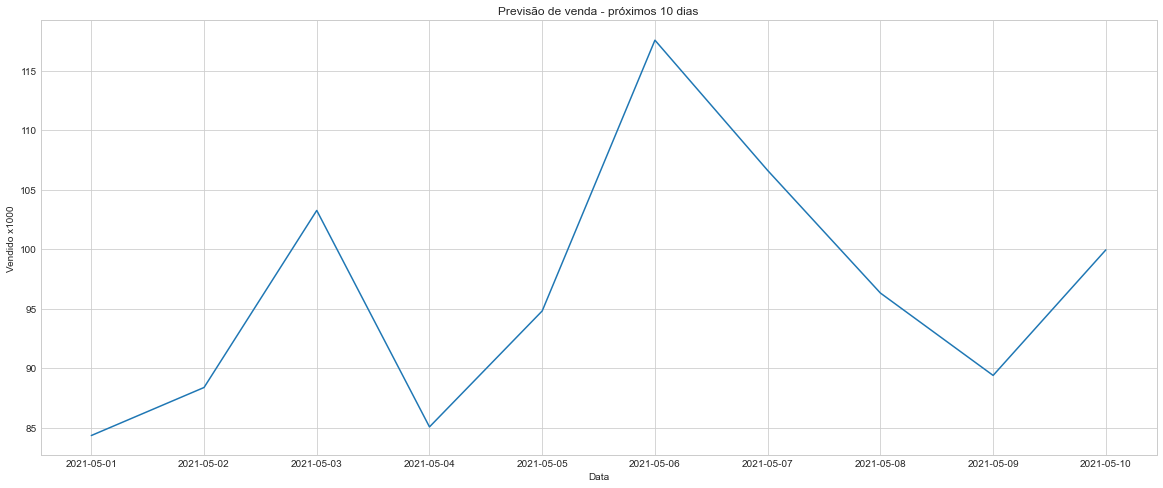

In [319]:
# Gráfico dos próximos 10 dias 
plt.figure(figsize=(20,8))
plt.title("Previsão de venda - próximos 10 dias")
plt.xlabel("Data")
plt.ylabel("Vendido x1000")
plt.plot(forecast["ValorPedido"])
plt.show();